# 🔥 Notebook Complet — NLP + Prétraitement + Vectorisation + Modèles Sentimentaux + SBERT + FAISS + GNN + RAG + Chatbot

## ✅ Chapitre 0 — Import des librairies et chargement des données

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 0 — Chargement ultra-robuste du dataset Sentiment140
#    Fonctionne avec TON fichier réel contenant target=4
# -------------------------------------------------------------
import csv
import pandas as pd
from google.colab import drive

# 🔧 Montage du Drive (une seule fois)
drive.mount('/content/drive', force_remount=True)

# 🔧 Chemins dans le Drive
# ⚠️ → MODIFIE ce chemin selon l'endroit où tu as mis data.csv
INPUT = "/content/drive/MyDrive/data.csv"
OUTPUT = "/content/drive/MyDrive/data_clean.csv"

print("⏳ Lecture du fichier réel :", INPUT)

rows = []

with open(INPUT, "r", encoding="latin-1", errors="ignore") as f:
    reader = csv.reader(f)

    for row in reader:
        # On attend exactement 6 colonnes
        if len(row) != 6:
            continue

        # nettoyer la colonne target
        tgt = row[0].replace('"','').replace("'", "").strip()

        # garder uniquement 0 et 4
        if tgt not in ["0", "4"]:
            continue

        row[0] = tgt  # correction
        rows.append(row)

# conversion en DataFrame
df = pd.DataFrame(rows, columns=["target","id","date","flag","user","text"])
df["target"] = df["target"].astype(int)

print("\n✅ Chargement terminé !")
print("✅ Total lignes gardées :", len(df))

print("\n✅ Aperçu :")
print(df.head())

print("\n✅ Distribution des labels :")
print(df["target"].value_counts())

print("\n✅ Nombre de tweets négatifs :", (df['target']==0).sum())
print("✅ Nombre de tweets positifs :", (df['target']==4).sum())

df.to_csv(OUTPUT, index=False, encoding="utf-8")
print("\n✅ Fichier nettoyé écrit dans :", OUTPUT)


Mounted at /content/drive
⏳ Lecture du fichier réel : /content/drive/MyDrive/data.csv

✅ Chargement terminé !
✅ Total lignes gardées : 1600000

✅ Aperçu :
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

✅ Distribution des la

In [ ]:
positifs = df[df["target"] == 4]
print("\n✅ Nombre de tweets positifs (target = 4) :", len(positifs))
print("\n✅ Exemple tweet positif :")
print(positifs.head())



✅ Nombre de tweets positifs (target = 4) : 800000

✅ Exemple tweet positif :
        target          id                          date      flag  \
800000       4  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       4  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       4  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       4  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       4  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   

               user                                               text  
800000        ersle       I LOVE @Health4UandPets u guys r the best!!   
800001     becca210  im meeting up with one of my besties tonight! ...  
800002    Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...  
800003    katarinka  Being sick can be really cheap when it hurts t...  
800004  _EmilyYoung    @LovesBrooklyn2 he has that effect on everyone   


## ✅ Chapitre 1 — Nettoyage avancé du texte (stopwords, urls, ponctuations, espaces, caractères spéciaux, tokens, short words, stemming)

In [ ]:
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")   # ✅ nécessaire maintenant !
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 1 — Nettoyage du texte (stopwords conservés)
# -------------------------------------------------------------
import re
import joblib
import pandas as pd
from google.colab import drive

# s'assurer que le Drive est monté
drive.mount('/content/drive')

# Chemin de sauvegarde dans ton Drive
SAVE_PATH = "/content/drive/MyDrive/df_clean.pkl"

def clean_text_fast(text):
    if pd.isna(text):
        return ""

    text = text.lower()

    # Nettoyage rapide (sans NLTK)
    text = re.sub(r"http\S+", "", text)        # URLs
    text = re.sub(r"@\w+", "", text)          # mentions
    text = re.sub(r"[^a-zA-Z ]", " ", text)   # ponctuation, emojis, chiffres
    text = re.sub(r"\s+", " ", text).strip()

    # garder les stopwords → pas de filtre
    tokens = text.split()

    # retirer les tokens trop courts
    tokens = [t for t in tokens if len(t) > 2]

    return " ".join(tokens)

# -------------------------------------------------------------
# 1) Nettoyage
# -------------------------------------------------------------
df["clean_text"] = df["text"].astype(str).apply(clean_text_fast)

print("✅ Nettoyage rapide terminé !")
print(df[["text","clean_text"]].head())

# -------------------------------------------------------------
# 2) Sauvegarde dans Google Drive
# -------------------------------------------------------------
joblib.dump(df, SAVE_PATH)

print(f"✅ df_clean.pkl enregistré dans : {SAVE_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Nettoyage rapide terminé !
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  awww that bummer you shoulda got david carr th...  
1  upset that can update his facebook texting and...  
2  dived many times for the ball managed save the...  
3           whole body feels itchy and like its fire  
4  not behaving all mad why here because can see ...  
✅ df_clean.pkl enregistré dans : /content/drive/MyDrive/df_clean.pkl


In [ ]:
#les 5 premiers textes nettoyés
print(df['clean_text'].head())

0    awww that bummer you shoulda got david carr th...
1    upset that can update his facebook texting and...
2    dived many times for the ball managed save the...
3             whole body feels itchy and like its fire
4    not behaving all mad why here because can see ...
Name: clean_text, dtype: object


In [ ]:
#le texte brut + texte nettoyé (super pratique)
df[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer you shoulda got david carr th...
1,is upset that he can't update his Facebook by ...,upset that can update his facebook texting and...
2,@Kenichan I dived many times for the ball. Man...,dived many times for the ball managed save the...
3,my whole body feels itchy and like its on fire,whole body feels itchy and like its fire
4,"@nationwideclass no, it's not behaving at all....",not behaving all mad why here because can see ...


## ✅ Chapitre 2 — Vectorisation : TF, TF-IDF, CountVectorizer, Word2Vec, SBERT

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 2 : Vectorisation TF-IDF et CountVectorizer
# -------------------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import joblib
import numpy as np
from google.colab import drive

# Monter Google Drive si nécessaire
drive.mount('/content/drive')

# Chemin de sauvegarde dans ton Drive
SAVE_DIR = "/content/drive/MyDrive/"
TFIDF_PATH = SAVE_DIR + "tfidf_vectorizer.pkl"
COUNT_PATH = SAVE_DIR + "count_vectorizer.pkl"
MAT_TFIDF_PATH = SAVE_DIR + "X_tfidf.pkl"
MAT_COUNT_PATH = SAVE_DIR + "X_count.pkl"

# -------------------------------------------------------------
# 1) Vérification du DataFrame
# -------------------------------------------------------------
if 'df' not in globals():
    raise ValueError("❌ Le DataFrame df n'existe pas. Charge d’abord df_clean.pkl.")

if 'clean_text' not in df.columns:
    raise ValueError("❌ Il manque la colonne clean_text. Exécute Chapitre 1.")

if df['clean_text'].isna().all() or df['clean_text'].str.strip().eq("").all():
    raise ValueError("❌ clean_text est vide ! Vérifie le nettoyage.")

texts = df['clean_text'].astype(str).tolist()

print(f"✅ Nombre total de tweets nettoyés : {len(texts)}")

# -------------------------------------------------------------
# 2) Vectorisation TF-IDF
# -------------------------------------------------------------
tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 2),
    min_df=2,
)

X_tfidf = tfidf.fit_transform(texts)
print("✅ TF-IDF OK. Shape =", X_tfidf.shape)

# -------------------------------------------------------------
# 3) Vectorisation CountVectorizer (Bag-of-Words)
# -------------------------------------------------------------
count = CountVectorizer(
    max_features=20000,
    min_df=2,
)

X_count = count.fit_transform(texts)
print("✅ CountVectorizer OK. Shape =", X_count.shape)

# -------------------------------------------------------------
# 4) Statistiques utiles
# -------------------------------------------------------------
vocab_tfidf = tfidf.get_feature_names_out()
vocab_count = count.get_feature_names_out()

print("\n🔎 10 premiers mots TF-IDF :", vocab_tfidf[:10])
print("🔎 10 premiers mots CountVectorizer :", vocab_count[:10])

tweet_lengths = np.array([len(t.split()) for t in texts])

print("\n📏 Longueur moyenne des tweets :", np.round(tweet_lengths.mean(), 2))
print("📏 Longueur max :", tweet_lengths.max())
print("📏 Longueur min :", tweet_lengths.min())

empty_tweets = np.sum(tweet_lengths == 0)
print("⚠️ Tweets vides après nettoyage :", empty_tweets)

print("\n📊 20 mots les plus fréquents (CountVectorizer) :")
word_freq = np.asarray(X_count.sum(axis=0)).ravel()
top20_idx = word_freq.argsort()[-20:][::-1]
top20_words = vocab_count[top20_idx]
top20_counts = word_freq[top20_idx]

for w, c in zip(top20_words, top20_counts):
    print(f"{w} : {c}")

# -------------------------------------------------------------
# 5) Sauvegarde dans Google Drive
# -------------------------------------------------------------
joblib.dump(tfidf, TFIDF_PATH)
joblib.dump(count, COUNT_PATH)
joblib.dump(X_tfidf, MAT_TFIDF_PATH)
joblib.dump(X_count, MAT_COUNT_PATH)

print("\n✅ Sauvegardes terminées :")
print("✔", TFIDF_PATH)
print("✔", COUNT_PATH)
print("✔", MAT_TFIDF_PATH)
print("✔", MAT_COUNT_PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Nombre total de tweets nettoyés : 1600000
✅ TF-IDF OK. Shape = (1600000, 20000)
✅ CountVectorizer OK. Shape = (1600000, 20000)

🔎 10 premiers mots TF-IDF : ['aaaah' 'aaah' 'aah' 'aaron' 'abandoned' 'abby' 'abc' 'ability' 'abit'
 'able']
🔎 10 premiers mots CountVectorizer : ['aaa' 'aaaa' 'aaaaa' 'aaaaaa' 'aaaaaah' 'aaaaah' 'aaaaand' 'aaaah'
 'aaaahhh' 'aaaahhhh']

📏 Longueur moyenne des tweets : 9.4
📏 Longueur max : 34
📏 Longueur min : 0
⚠️ Tweets vides après nettoyage : 4844

📊 20 mots les plus fréquents (CountVectorizer) :
the : 523886
and : 303624
you : 302249
for : 216376
that : 166049
have : 145646
but : 133528
just : 126972
with : 115333
not : 108710
was : 104660
this : 94575
now : 94005
can : 93782
good : 91347
day : 89561
all : 83582
out : 82254
get : 82172
like : 78573

✅ Sauvegardes terminées :
✔ /content/drive/MyDrive/tfidf_vectorizer.pkl
✔ /conte


📊 Distribution des labels :
label
0    800000
1    800000
Name: count, dtype: int64


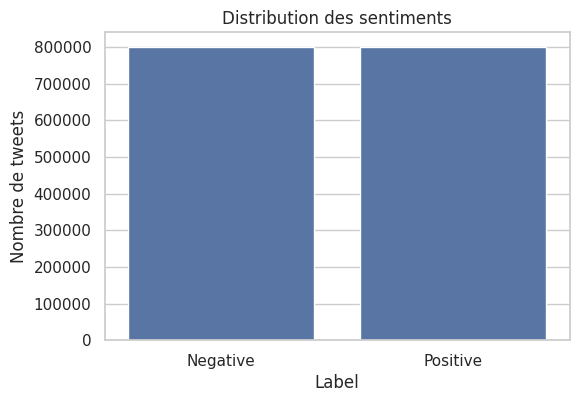

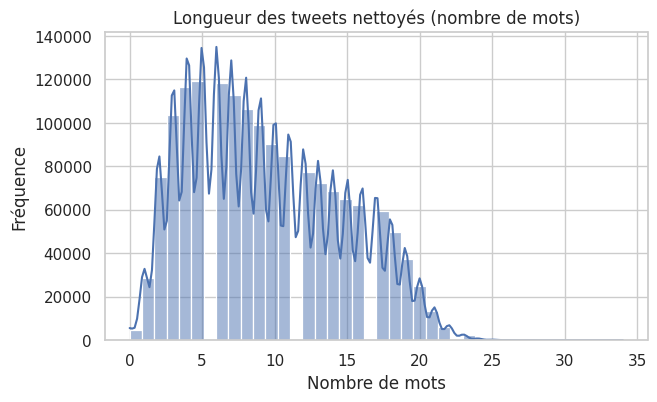

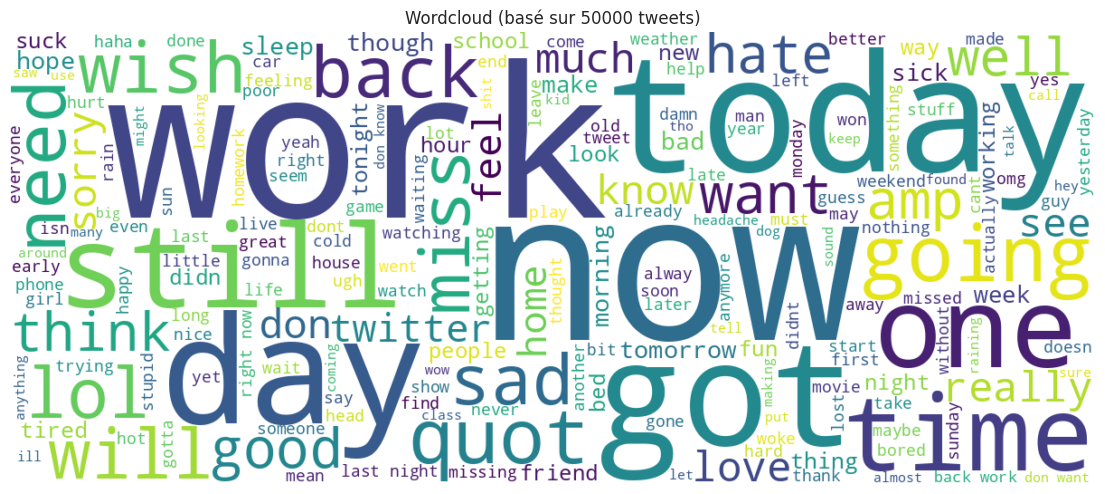

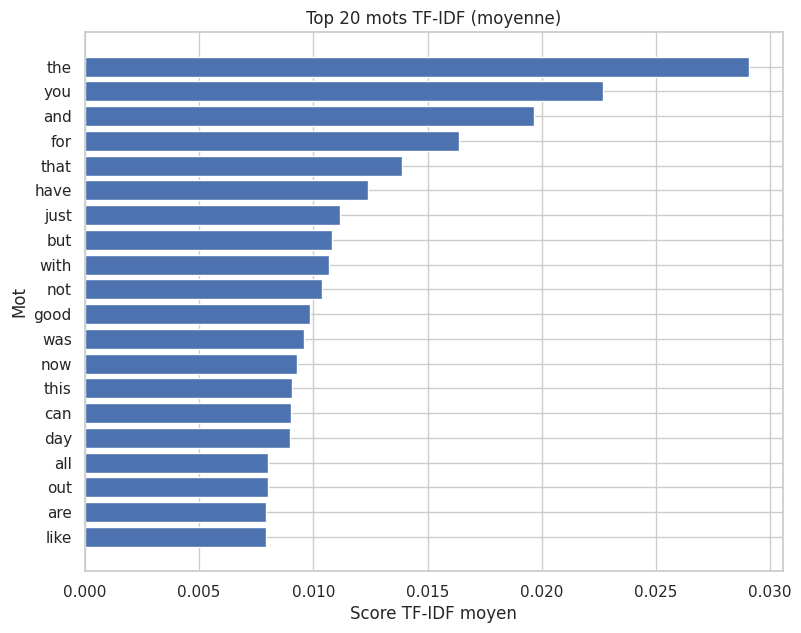

In [ ]:
# -------------------------------------------------------------
# CHAPITRE 2.5 — Visualisations simples
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

sns.set(style="whitegrid")

# -------------------------------------------------------------
# Vérifications des variables
# -------------------------------------------------------------
if 'df' not in globals():
    raise ValueError("❌ df introuvable. Exécute CHAP 0 puis CHAP 1.")

if 'clean_text' not in df.columns:
    raise ValueError("❌ clean_text manquant. Exécute CHAP 1.")

if 'X_tfidf' not in globals() or 'tfidf' not in globals():
    raise ValueError("❌ X_tfidf ou tfidf manquant. Exécute CHAP 2.")

# -------------------------------------------------------------
# Reconstruction des labels
# -------------------------------------------------------------
if 'label' not in df.columns:
    if 'target' in df.columns:
        df = df[df['target'].isin([0, 4])].copy()
        df['label'] = df['target'].replace({0: 0, 4: 1}).astype(int)
    else:
        raise ValueError("❌ target manquant. Vérifie CHAP 0.")

print("\n📊 Distribution des labels :")
print(df['label'].value_counts())

# -------------------------------------------------------------
# 1) Distribution simple des labels
# -------------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Distribution des sentiments')
plt.xlabel('Label')
plt.ylabel('Nombre de tweets')
plt.show()

# -------------------------------------------------------------
# 2) Histogramme longueur des tweets nettoyés
# -------------------------------------------------------------
tweet_lengths = df['clean_text'].astype(str).apply(lambda t: len(t.split()))

plt.figure(figsize=(7, 4))
sns.histplot(tweet_lengths, bins=40, kde=True)
plt.title('Longueur des tweets nettoyés (nombre de mots)')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

# -------------------------------------------------------------
# 3) WordCloud global (sécurisé)
# -------------------------------------------------------------
max_words_wc = 50_000 if len(df) > 50_000 else len(df)
all_text = " ".join(df['clean_text'].astype(str).tolist()[:max_words_wc])

wc = WordCloud(
    width=1200,
    height=500,
    background_color='white',
    max_words=200
).generate(all_text)

plt.figure(figsize=(14, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f"Wordcloud (basé sur {max_words_wc} tweets)")
plt.show()

# -------------------------------------------------------------
# 4) Top 20 mots TF-IDF
# -------------------------------------------------------------
tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()

# tri décroissant
top_idx = tfidf_scores.argsort()[::-1][:20]
top_words = tfidf.get_feature_names_out()[top_idx]
top_vals = tfidf_scores[top_idx]

plt.figure(figsize=(9, 7))
plt.barh(top_words[::-1], top_vals[::-1])  # inverse pour ordre visuel
plt.title("Top 20 mots TF-IDF (moyenne)")
plt.xlabel("Score TF-IDF moyen")
plt.ylabel("Mot")
plt.show()


## ✅ Chapitre 3 — Modèles de Sentiment : TF-IDF + LogisticRegression, DistilBERT (préparé), XLM-RoBERTa (préparé)

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 3 : Classification sentiment (TF-IDF + Logistic Regression)
# -------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import joblib
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/"
MODEL_PATH = SAVE_DIR + "model_tfidf_lr.pkl"

# -------------------------------------------------------------
# 1) Vérifications d'existence
# -------------------------------------------------------------
if 'df' not in globals():
    raise ValueError("❌ df introuvable — exécute CHAP 0 et CHAP 1 avant.")

if 'clean_text' not in df.columns:
    raise ValueError("❌ clean_text manquant — exécute CHAP 1.")

if 'X_tfidf' not in globals():
    raise ValueError("❌ X_tfidf inexistant — exécute CHAP 2.")

if df.shape[0] != X_tfidf.shape[0]:
    raise ValueError(f"""
❌ Problème d'alignement !
df = {df.shape[0]} lignes
TF-IDF = {X_tfidf.shape[0]} lignes

➡ Assure-toi de ne PAS réindexer df après la vectorisation.
""")

print("✅ Vérifications OK")

# -------------------------------------------------------------
# 2) Filtrer les labels valides (0 = neg, 4 = pos)
# -------------------------------------------------------------
df_clf = df[df['target'].isin([0, 4])].copy()

print("\n📊 Distribution des labels 0/4 :")
print(df_clf['target'].value_counts())

# -------------------------------------------------------------
# 3) Créer la colonne binaire label
# -------------------------------------------------------------
df_clf['label'] = df_clf['target'].replace({0: 0, 4: 1}).astype(int)

print("\n📊 Distribution binaire 0/1 :")
print(df_clf['label'].value_counts())

# -------------------------------------------------------------
# 4) Alignement X / y
# -------------------------------------------------------------
# On aligne TF-IDF sur les lignes conservées
X = X_tfidf[df_clf.index]
y = df_clf['label'].values

print("\n✅ X et y alignés :")
print("X shape =", X.shape)
print("y length =", len(y))

# -------------------------------------------------------------
# 5) Train/Test Split
# -------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # garde un split équilibré
)

print("\n✅ Train/Test split OK")

# -------------------------------------------------------------
# 6) Entraînement Logistic Regression
# -------------------------------------------------------------
print("\n⏳ Entraînement Logistic Regression…")

lr = LogisticRegression(
    max_iter=2000,
    n_jobs=-1,
    class_weight='balanced'  # utile si dataset déséquilibré
)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# -------------------------------------------------------------
# 7) Rapport de performance
# -------------------------------------------------------------
print("\n🎯 Résultats Logistic Regression :")
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print("🧩 Confusion Matrix :\n", cm)

# -------------------------------------------------------------
# 8) Sauvegarde modèle
# -------------------------------------------------------------
joblib.dump(lr, MODEL_PATH)
print(f"\n✅ Modèle sauvegardé dans : {MODEL_PATH}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Vérifications OK

📊 Distribution des labels 0/4 :
target
0    800000
4    800000
Name: count, dtype: int64

📊 Distribution binaire 0/1 :
label
0    800000
1    800000
Name: count, dtype: int64

✅ X et y alignés :
X shape = (1600000, 20000)
y length = 1600000

✅ Train/Test split OK

⏳ Entraînement Logistic Regression…

🎯 Résultats Logistic Regression :
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160000
           1       0.80      0.82      0.81    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

🧩 Confusion Matrix :
 [[126351  33649]
 [ 29089 130911]]

✅ Modèle sauvegardé dans : /content/drive/MyDrive/model_tfidf_lr.pkl


## ✅ CHAPITRE 4 — Modèle TF-IDF + SVM (LinearSVC)

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 4 — Classification TF-IDF + SVM (LinearSVC)
# -------------------------------------------------------------
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import drive

print("================================================")
print("✅ CHAPITRE 4 — Classification TF-IDF + SVM")
print("================================================")

# Monter Google Drive
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/"
MODEL_PATH = SAVE_DIR + "model_tfidf_svm.pkl"

# -------------------------------------------------------------
# 1) Vérifications
# -------------------------------------------------------------
required_vars = ["X_train", "X_test", "y_train", "y_test", "X", "y"]

for var in required_vars:
    if var not in globals():
        raise ValueError(f"❌ Variable manquante : {var} — exécute CHAPITRE 3 avant.")

print("✅ Vérifications OK — données du CHAP 3 chargées.")

# -------------------------------------------------------------
# 2) Entraînement SVM
# -------------------------------------------------------------
print("\n⏳ Entraînement SVM (LinearSVC)…")

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

# -------------------------------------------------------------
# 3) Rapport de performance
# -------------------------------------------------------------
print("\n🎯 Rapport Classification (SVM LinearSVC) :")
print(classification_report(y_test, svm_pred))

cm_svm = confusion_matrix(y_test, svm_pred)
print("\n🧩 Confusion Matrix SVM :\n", cm_svm)

# -------------------------------------------------------------
# 4) Sauvegarde du modèle dans Google Drive
# -------------------------------------------------------------
joblib.dump(svm_model, MODEL_PATH)
print(f"\n✅ Modèle SVM sauvegardé dans : {MODEL_PATH}")


✅ CHAPITRE 4 — Classification TF-IDF + SVM
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Vérifications OK — données du CHAP 3 chargées.

⏳ Entraînement SVM (LinearSVC)…

🎯 Rapport Classification (SVM LinearSVC) :
              precision    recall  f1-score   support

           0       0.82      0.79      0.80    160000
           1       0.79      0.82      0.81    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000


🧩 Confusion Matrix SVM :
 [[125619  34381]
 [ 28444 131556]]

✅ Modèle SVM sauvegardé dans : /content/drive/MyDrive/model_tfidf_svm.pkl


##✅ CHAPITRE 5 — Modèle TF-IDF + Random Forest

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 5 — Random Forest ULTRA RAPIDE pour TF-IDF
# -------------------------------------------------------------
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import drive

print("================================================")
print("✅ CHAPITRE 5 — Random Forest ULTRA RAPIDE")
print("================================================")

# Monter Google Drive
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/"
MODEL_PATH = SAVE_DIR + "model_tfidf_rf.pkl"

# -------------------------------------------------------------
# 1) Vérifications
# -------------------------------------------------------------
if 'df_clf' not in globals():
    raise ValueError("❌ df_clf introuvable — exécuté CHAPITRE 3 avant.")

if 'X_tfidf' not in globals():
    raise ValueError("❌ X_tfidf introuvable — exécuté CHAPITRE 2 avant.")

# -------------------------------------------------------------
# 2) Sous-échantillonnage max 20 000 tweets
# -------------------------------------------------------------
N = 20000
N = min(N, len(df_clf))   # évite crash si dataset < 20k

df_small = df_clf.sample(N, random_state=42)

X_small = X_tfidf[df_small.index]
y_small = df_small['label'].values

print(f"📉 Sous-échantillonnage : {N} tweets")

# -------------------------------------------------------------
# 3) Train/Test Split
# -------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_small, y_small,
    test_size=0.20,
    random_state=42,
    stratify=y_small
)

print("🧪 Taille training RF :", X_train_sm.shape)

# -------------------------------------------------------------
# 4) Random Forest léger & rapide
# -------------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=40,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

print("\n⏳ Entraînement Random Forest rapide…")
start_time = time.time()

rf.fit(X_train_sm, y_train_sm)

elapsed = time.time() - start_time
print(f"✅ Entraînement terminé en {elapsed:.2f} sec.")

# -------------------------------------------------------------
# 5) Évaluation
# -------------------------------------------------------------
pred = rf.predict(X_test_sm)

print("\n🎯 Rapport Classification Random Forest :")
print(classification_report(y_test_sm, pred))

print("\n🧩 Matrice de Confusion :")
cm = confusion_matrix(y_test_sm, pred)
print(cm)

# -------------------------------------------------------------
# 6) Sauvegarde du modèle dans Drive
# -------------------------------------------------------------
joblib.dump(rf, MODEL_PATH)
print(f"\n💾 Modèle Random Forest sauvegardé : {MODEL_PATH}")


✅ CHAPITRE 5 — Random Forest ULTRA RAPIDE
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📉 Sous-échantillonnage : 20000 tweets
🧪 Taille training RF : (16000, 20000)

⏳ Entraînement Random Forest rapide…
✅ Entraînement terminé en 1.00 sec.

🎯 Rapport Classification Random Forest :
              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1988
           1       0.66      0.80      0.72      2012

    accuracy                           0.69      4000
   macro avg       0.70      0.69      0.69      4000
weighted avg       0.70      0.69      0.69      4000


🧩 Matrice de Confusion :
[[1149  839]
 [ 394 1618]]

💾 Modèle Random Forest sauvegardé : /content/drive/MyDrive/model_tfidf_rf.pkl


##✅ CHAPITRE 6 — Comparaison des modèles

In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 6 — Comparaison des 3 modèles TF-IDF
# -------------------------------------------------------------
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import joblib
from google.colab import drive

print("================================================")
print("✅ CHAPITRE 6 — Comparaison des modèles TF-IDF")
print("================================================")

# -------------------------------------------------------------
# 1) Google Drive
# -------------------------------------------------------------
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/"

# -------------------------------------------------------------
# 2) Chargement des modèles sauvegardés
# -------------------------------------------------------------
try:
    lr_model = joblib.load(SAVE_DIR + "model_tfidf_lr.pkl")
    svm_model = joblib.load(SAVE_DIR + "model_tfidf_svm.pkl")
    rf_model  = joblib.load(SAVE_DIR + "model_tfidf_rf.pkl")
    print("✅ Tous les modèles chargés depuis Google Drive.")
except Exception as e:
    raise ValueError(f"❌ Modèles manquants : {e}")

models = {
    "Logistic Regression": lr_model,
    "Linear SVM": svm_model,
    "Random Forest": rf_model
}

# -------------------------------------------------------------
# 3) Comparaison des performances
# -------------------------------------------------------------
results = []

for name, model in models.items():

    # ⚠ IMPORTANT : RF a été entraîné sur X_test_sm / y_test_sm !
    if name == "Random Forest":
        preds = model.predict(X_test_sm)
        acc = accuracy_score(y_test_sm, preds)
        f1  = f1_score(y_test_sm, preds)

    else:
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        f1  = f1_score(y_test, preds)

    results.append([name, acc, f1])

df_compare = pd.DataFrame(results, columns=["Modèle", "Accuracy", "F1-score"])

print("\n📊 Tableau comparatif :")
display(df_compare)

# -------------------------------------------------------------
# 4) Sélection du meilleur modèle (sur F1-score)
# -------------------------------------------------------------
best_row = df_compare.sort_values(by="F1-score", ascending=False).iloc[0]
best_name = best_row["Modèle"]
best_model = models[best_name]

print(f"\n🏆 Meilleur modèle détecté : {best_name}")

# -------------------------------------------------------------
# 5) Sauvegarde sous un nom final
# -------------------------------------------------------------
BEST_PATH = SAVE_DIR + "best_sentiment_model.pkl"
joblib.dump(best_model, BEST_PATH)

print(f"\n💾 Meilleur modèle sauvegardé sous : {BEST_PATH}")


✅ CHAPITRE 6 — Comparaison des modèles TF-IDF
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Tous les modèles chargés depuis Google Drive.

📊 Tableau comparatif :


,Modèle,Accuracy,F1-score
0,Logistic Regression,0.803944,0.806698
1,Linear SVM,0.803672,0.807248
2,Random Forest,0.691750,0.724099



🏆 Meilleur modèle détecté : Linear SVM

💾 Meilleur modèle sauvegardé sous : /content/drive/MyDrive/best_sentiment_model.pkl


## ✅ Chapitre 7 — SBERT + FAISS (Vector Search pour RAG)

In [ ]:
!pip install faiss-cpu --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 87.4 MB/s eta 0:00:00


In [ ]:
# -------------------------------------------------------------
# ✅ CHAPITRE 7 optimisé : SBERT + FAISS (rapide)
# -------------------------------------------------------------
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss
import joblib
from google.colab import drive
import os

# -------------------------------------------------------------
# 1) Montage Google Drive
# -------------------------------------------------------------
drive.mount('/content/drive')

SAVE_DIR = "/content/drive/MyDrive/"
os.makedirs(SAVE_DIR, exist_ok=True)

print("📁 Dossier de sauvegarde :", SAVE_DIR)

# -------------------------------------------------------------
# 2) Vérification
# -------------------------------------------------------------
if 'df' not in globals():
    raise ValueError("❌ df introuvable. Charge CHAP 0 à 3.")

if "clean_text" not in df.columns:
    raise ValueError("❌ clean_text manquant. Exécute CHAPITRE 1.")

print(f"📌 Nombre total de tweets disponibles : {len(df)}")

# -------------------------------------------------------------
# 3) Sous-échantillonnage
# -------------------------------------------------------------
N = 40000
df_sample = df.sample(N, random_state=42).reset_index(drop=True)
texts = df_sample["clean_text"].astype(str).tolist()

print(f"✅ Nombre de tweets utilisés pour SBERT : {len(texts)}")

# -------------------------------------------------------------
# 4) SBERT rapide
# -------------------------------------------------------------
print("⏳ Chargement du modèle SBERT (all-MiniLM-L6-v2)…")
model_sbert = SentenceTransformer("all-MiniLM-L6-v2")

print("⏳ Encodage SBERT…")
embeddings = model_sbert.encode(
    texts,
    batch_size=512,
    convert_to_numpy=True,
    show_progress_bar=True,
).astype("float32")

print("✅ SBERT embeddings shape :", embeddings.shape)

# -------------------------------------------------------------
# 5) Normalisation L2 (obligatoire pour FAISS cosine)
# -------------------------------------------------------------
faiss.normalize_L2(embeddings)
print("✅ Normalisation faite.")

# -------------------------------------------------------------
# 6) Création index FAISS (cosine = Inner Product)
# -------------------------------------------------------------
dim = embeddings.shape[1]
index = faiss.IndexFlatIP(dim)
index.add(embeddings)

print(f"🔥 Index FAISS créé avec {index.ntotal} vecteurs.")

# -------------------------------------------------------------
# 7) Sauvegardes complètes dans Google Drive
# -------------------------------------------------------------

# FAISS index
faiss.write_index(index, SAVE_DIR + "faiss_index.bin")
print("💾 FAISS index sauvegardé → faiss_index.bin")

# dataframe sample
joblib.dump(df_sample, SAVE_DIR + "df_sample.pkl")
print("💾 df_sample sauvegardé → df_sample.pkl")

# SBERT model (format HuggingFace compatible)
model_sbert.save(SAVE_DIR + "sbert_model/")
print("💾 SBERT sauvegardé → dossier sbert_model/")

# embeddings (optionnel)
np.save(SAVE_DIR + "embeddings_sample.npy", embeddings)
print("💾 embeddings_sample.npy sauvegardé")

print("\n🎉 CHAPITRE 7 terminé avec succès ! SBERT + FAISS prêts pour app.py")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Dossier de sauvegarde : /content/drive/MyDrive/
📌 Nombre total de tweets disponibles : 1600000
✅ Nombre de tweets utilisés pour SBERT : 40000
⏳ Chargement du modèle SBERT (all-MiniLM-L6-v2)…


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

⏳ Encodage SBERT…


Batches:   0%|          | 0/79 [00:00<?, ?it/s]

✅ SBERT embeddings shape : (40000, 384)
✅ Normalisation faite.
🔥 Index FAISS créé avec 40000 vecteurs.
💾 FAISS index sauvegardé → faiss_index.bin
💾 df_sample sauvegardé → df_sample.pkl
💾 SBERT sauvegardé → dossier sbert_model/
💾 embeddings_sample.npy sauvegardé

🎉 CHAPITRE 7 terminé avec succès ! SBERT + FAISS prêts pour app.py


## ✅ Chapitre 8 — Construction Graphe (NetworkX : user ↔ user (mentions)) + préparation GNN (PyG)

✅ DataFrame OK.
📌 Échantillon utilisé pour le graphe : 300 tweets

🔧 Construction du graphe...
📌 Nombre de nœuds : 427
📌 Nombre d’arêtes : 128

🔥 Top utilisateurs les plus connectés :
 - tina5b5 : 6 connexions
 - KaiRutlin : 2 connexions
 - NTyrer : 2 connexions
 - deniserostro : 2 connexions
 - Spitphyre : 2 connexions

🎨 Génération du graphe...


/tmp/ipython-input-2616804942.py:99: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/graphe_mentions.png", dpi=300, bbox_inches="tight")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


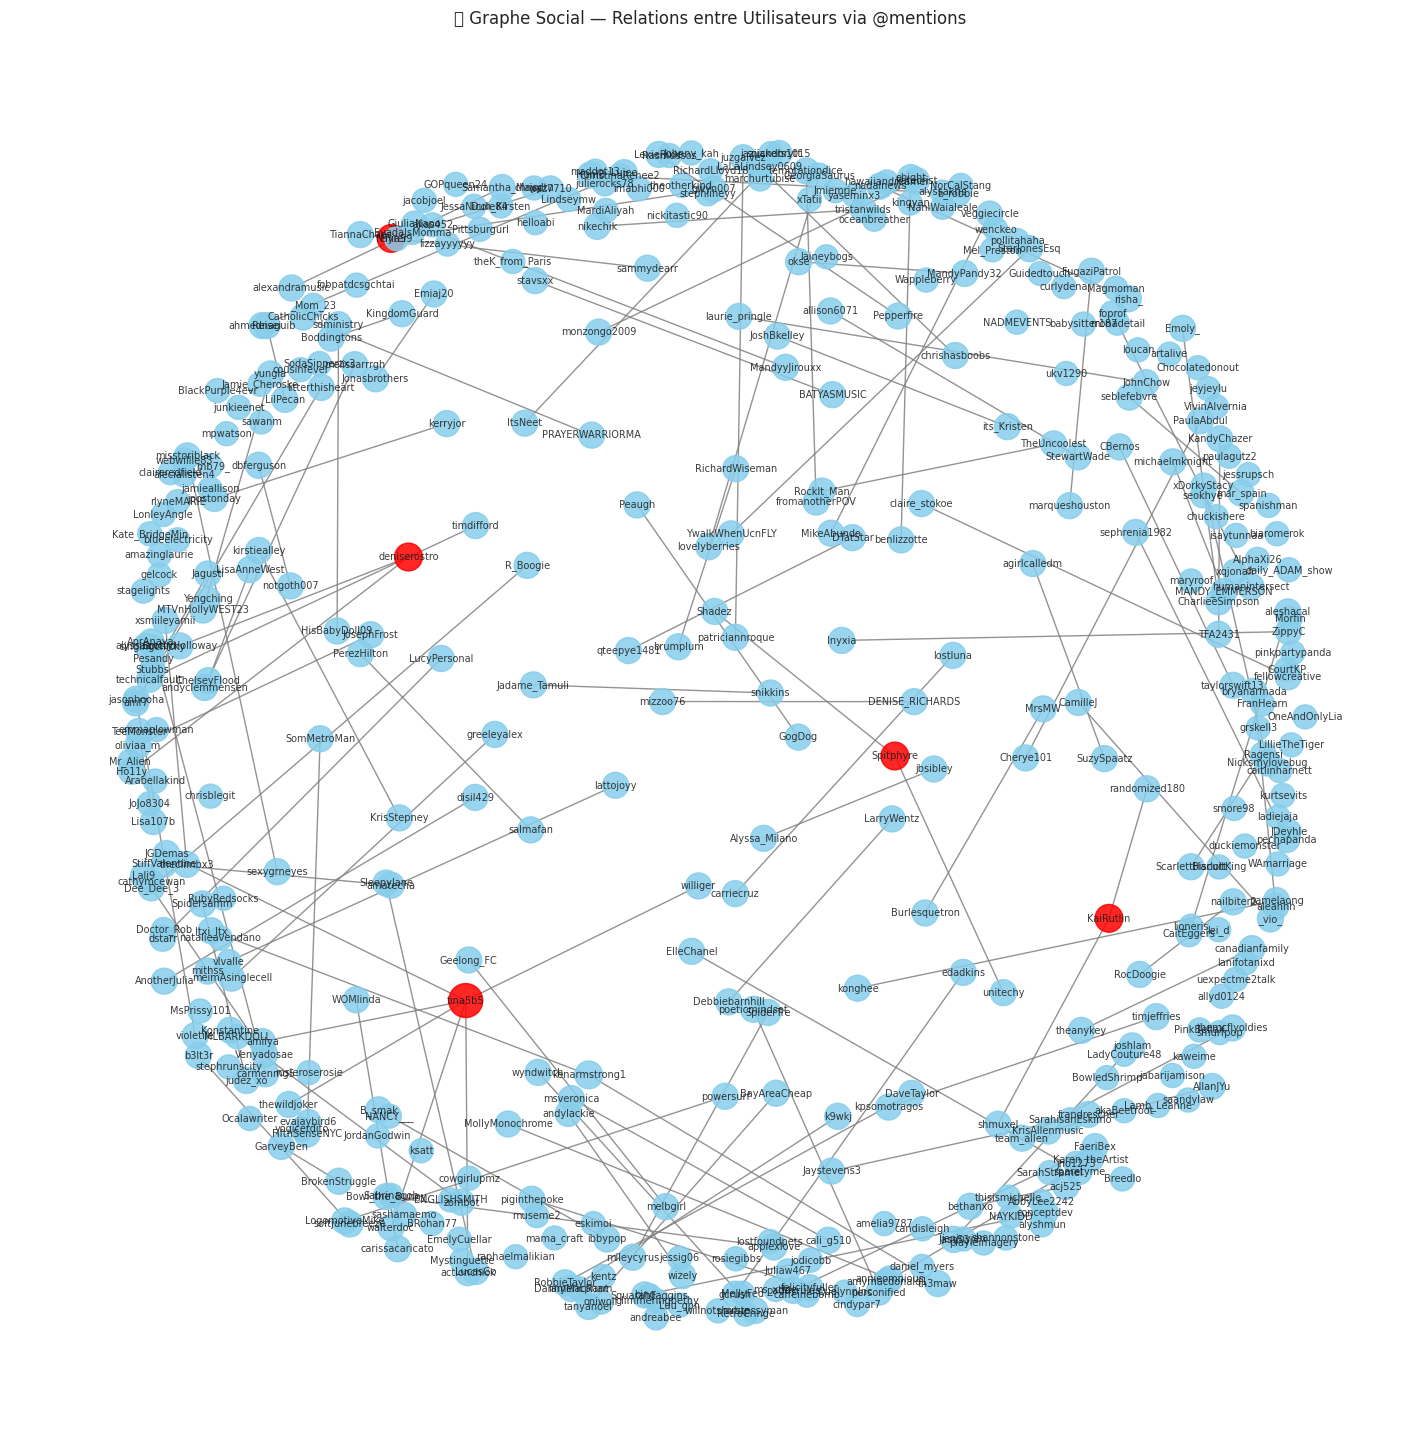


📁 Image sauvegardée sous : /content/graphe_mentions.png


In [ ]:
# =============================================================
# 📘 CHAPITRE 8 — Graphe Social USER ↔ USER via @mentions
# =============================================================

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

# -------------------------------------------------------------
# 1) Vérification du DataFrame
# -------------------------------------------------------------
if 'df' not in globals():
    raise ValueError("❌ DataFrame 'df' introuvable.")

if 'user' not in df.columns or 'text' not in df.columns:
    raise ValueError("❌ Il manque les colonnes 'user' ou 'text'.")

print("✅ DataFrame OK.")

# -------------------------------------------------------------
# 2) Extraction des mentions
# -------------------------------------------------------------
def extract_mentions(text):
    """Retourne toutes les mentions @username dans un tweet."""
    return re.findall(r"@([A-Za-z0-9_]+)", str(text))


# -------------------------------------------------------------
# 3) Sélection d’un échantillon pour un graphe lisible
# -------------------------------------------------------------
N = 300   # ← modifie pour ajuster la clarté
df_sample_graph = df.sample(N, random_state=42)

print(f"📌 Échantillon utilisé pour le graphe : {len(df_sample_graph)} tweets")


# -------------------------------------------------------------
# 4) Construction du graphe USER ↔ USER (mentions)
# -------------------------------------------------------------
print("\n🔧 Construction du graphe...")

G = nx.Graph()

for _, row in df_sample_graph.iterrows():
    author = str(row["user"]).strip()
    mentions = extract_mentions(row["text"])

    G.add_node(author)

    for m in mentions:
        m_user = m.strip()
        G.add_node(m_user)
        G.add_edge(author, m_user)

print("📌 Nombre de nœuds :", G.number_of_nodes())
print("📌 Nombre d’arêtes :", G.number_of_edges())


# -------------------------------------------------------------
# 5) Analyse du graphe — top influenceurs
# -------------------------------------------------------------
degree_dict = dict(G.degree())
top_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n🔥 Top utilisateurs les plus connectés :")
for user, deg in top_users:
    print(f" - {user} : {deg} connexions")


# -------------------------------------------------------------
# 6) Visualisation du graphe + sauvegarde de l’image
# -------------------------------------------------------------
print("\n🎨 Génération du graphe...")

plt.figure(figsize=(14, 14))

pos = nx.spring_layout(G, seed=42, k=0.4)

top_nodes = {u for u, _ in top_users}

node_colors = ["red" if n in top_nodes else "skyblue" for n in G.nodes()]
node_sizes  = [300 + 50*G.degree(n) for n in G.nodes()]

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color="gray",
    with_labels=True,
    font_size=7,
    alpha=0.85
)

plt.title("🌐 Graphe Social — Relations entre Utilisateurs via @mentions")

# 🔥🔥 Sauvegarde du graphe en haute résolution
plt.savefig("/content/graphe_mentions.png", dpi=300, bbox_inches="tight")

plt.show()

print("\n📁 Image sauvegardée sous : /content/graphe_mentions.png")



🧩 Interprétation du Graphe Social (@mentions)

Le graphe représente les relations entre utilisateurs sur Twitter à travers les mentions @. Chaque nœud correspond à un utilisateur, et chaque arête indique qu’un utilisateur en a mentionné un autre dans un tweet. Les utilisateurs les plus centraux (en rouge) sont ceux ayant le plus de connexions, ce qui suggère qu’ils jouent un rôle d’influence ou sont particulièrement actifs dans les échanges. La structure globale en réseau met en évidence plusieurs sous-communautés où les utilisateurs interagissent davantage entre eux. Ce graphe permet donc de visualiser les dynamiques sociales du corpus et d’identifier les profils les plus visibles ou influents.

➡️ Nœuds rouges = les utilisateurs les plus connectés du graphe
➡️ Nœuds bleus = les utilisateurs normaux du graphe

## ✅ GNN : User–User avec 2000 tweets

✅ Dataset OK
📌 Sous-échantillon utilisé : 2000 tweets

🔧 Construction du graphe...
📌 Nodes : 1851
📌 Edges : 973
📌 Largest connected component : 14


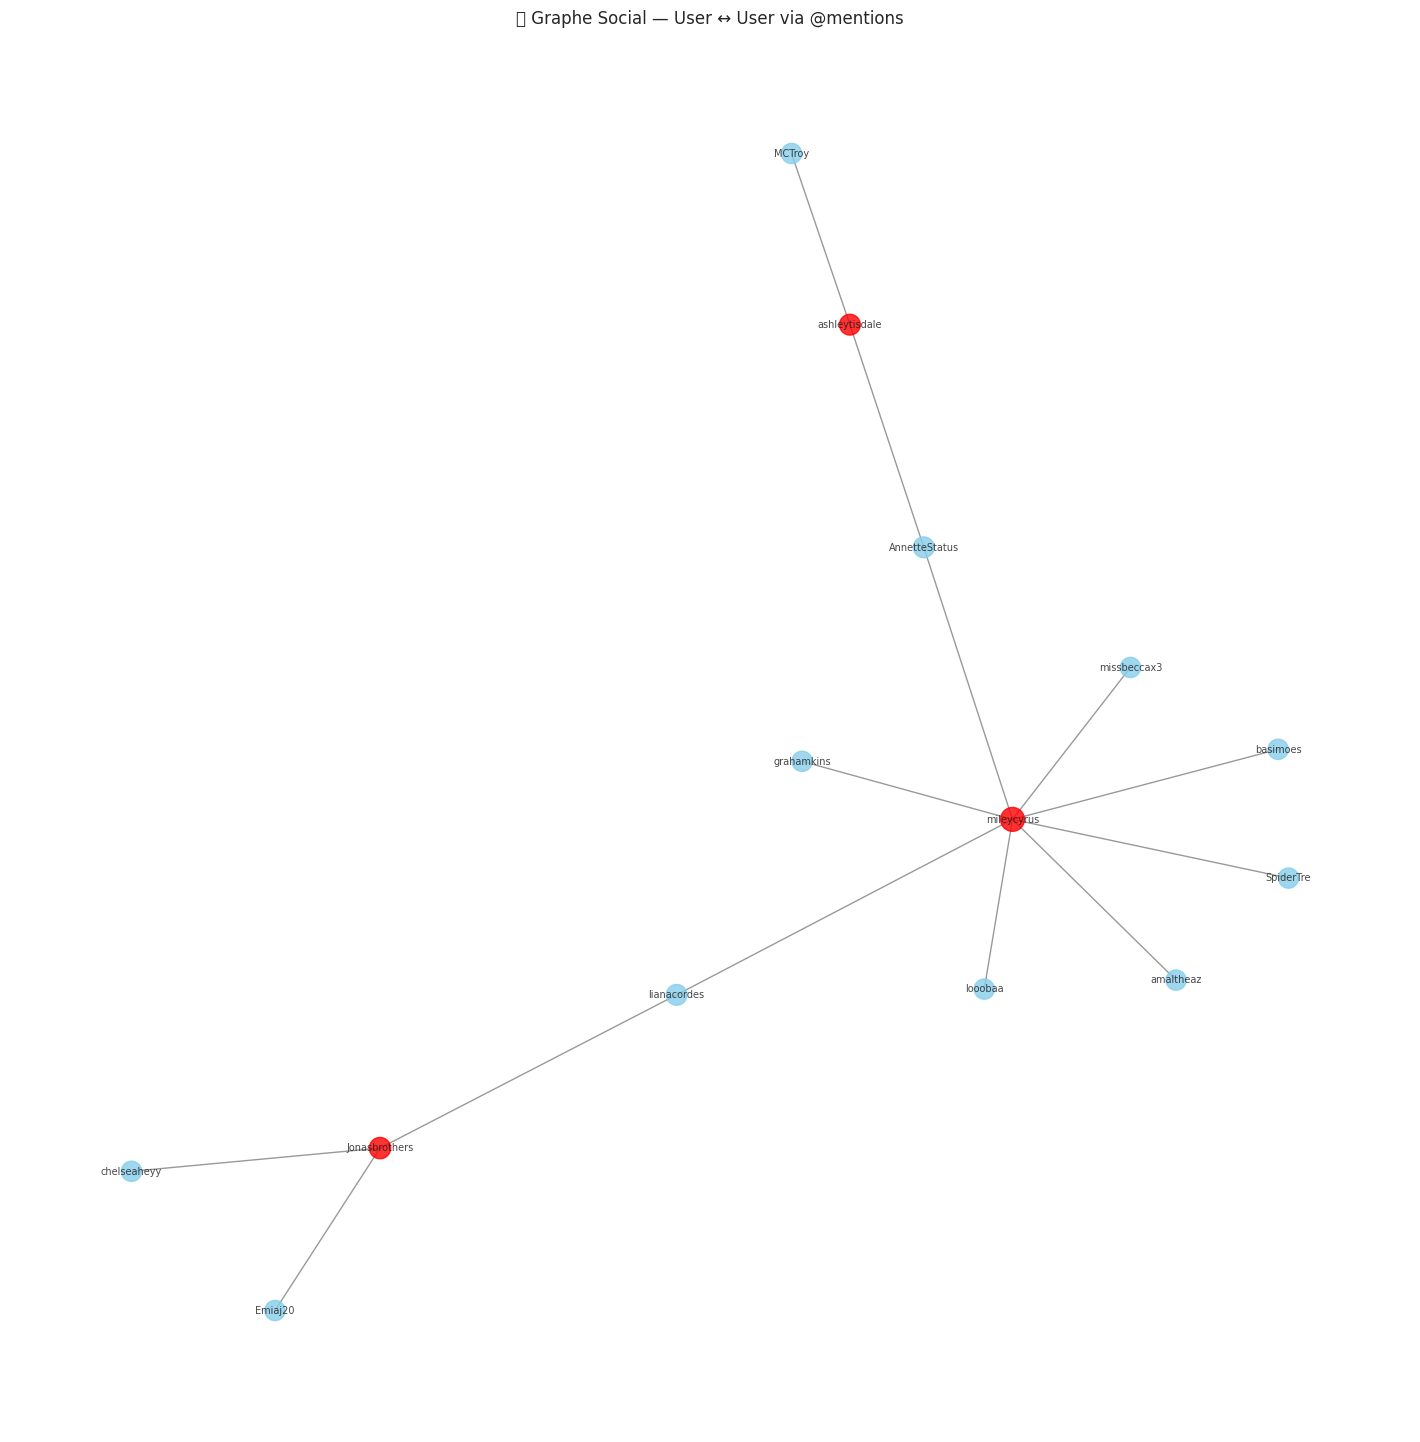


✅ GRAPHE USER–USER TERMINE


In [ ]:

# ============================================================
# 📘 Graphe USER ↔ USER (mentions)
# ============================================================
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import re

# -------------------------------------------------------------
# 1) Vérification dataset
# -------------------------------------------------------------
if "df" not in globals():
    raise ValueError("❌ df introuvable. Charge ton dataset.")

if "user" not in df.columns or "text" not in df.columns:
    raise ValueError("❌ Colonnes manquantes : 'user' ou 'text'.")

print("✅ Dataset OK")

# -------------------------------------------------------------
# 2) Sous-échantillonnage
# -------------------------------------------------------------
N = min(2000, len(df))
df_sample = df.sample(N, random_state=42).reset_index(drop=True)

print(f"📌 Sous-échantillon utilisé : {len(df_sample)} tweets")


# -------------------------------------------------------------
# 3) Extraction des mentions
# -------------------------------------------------------------
def extract_mentions(text):
    return re.findall(r"@([A-Za-z0-9_]+)", str(text))


# -------------------------------------------------------------
# 4) Graphe USER ↔ USER
# -------------------------------------------------------------
print("\n🔧 Construction du graphe...")

G = nx.Graph()

for _, row in df_sample.iterrows():
    author = str(row["user"]).strip()
    mentions = extract_mentions(row["text"])

    if not mentions:
        continue

    G.add_node(author, type="author")

    for m in mentions:
        G.add_node(m, type="mentioned")
        G.add_edge(author, m)

print("📌 Nodes :", G.number_of_nodes())
print("📌 Edges :", G.number_of_edges())


# -------------------------------------------------------------
# 5) Plus grand composant
# -------------------------------------------------------------
components = sorted(nx.connected_components(G), key=len, reverse=True)
giant = G.subgraph(list(components[0])).copy()

print("📌 Largest connected component :", giant.number_of_nodes())

# -------------------------------------------------------------
# 6) Viz
# -------------------------------------------------------------
plt.figure(figsize=(14, 14))

pos = nx.spring_layout(giant, seed=42)

node_colors = [
    "skyblue" if giant.nodes[n]["type"] == "author" else "red"
    for n in giant.nodes()
]
node_sizes = [200 + 12 * giant.degree(n) for n in giant.nodes()]

nx.draw(
    giant,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color="gray",
    alpha=0.8,
    with_labels=True,
    font_size=7
)

plt.title("🌐 Graphe Social — User ↔ User via @mentions")
plt.show()

print("\n✅ GRAPHE USER–USER TERMINE")


## ✅ GNN : Tweet–Tweet 3000 tweets, Graphe SBERT (avec filtration des nœuds isolés)

✅ Dataset OK : 1600000 tweets
⚠️ Dataset trop grand (1600000). Échantillonnage → 2000
📌 Tweets utilisés pour SBERT : 2000
⏳ Génération des embeddings SBERT…


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

✅ Embeddings shape : (2000, 384)
⏳ Calcul matrice de similarité… (complexité N²)
🔗 Seuil similarity = 0.55
🔧 Construction du graphe Tweet → Tweet…
📌 Nombre de nœuds : 2000
📌 Nombre d’arêtes : 1421
⏳ Suppression des nœuds isolés…
🗑️ Nombre de nœuds isolés supprimés : 1381
📌 Nouveau nombre de nœuds : 619
📌 Nouveau nombre d’arêtes : 1421


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


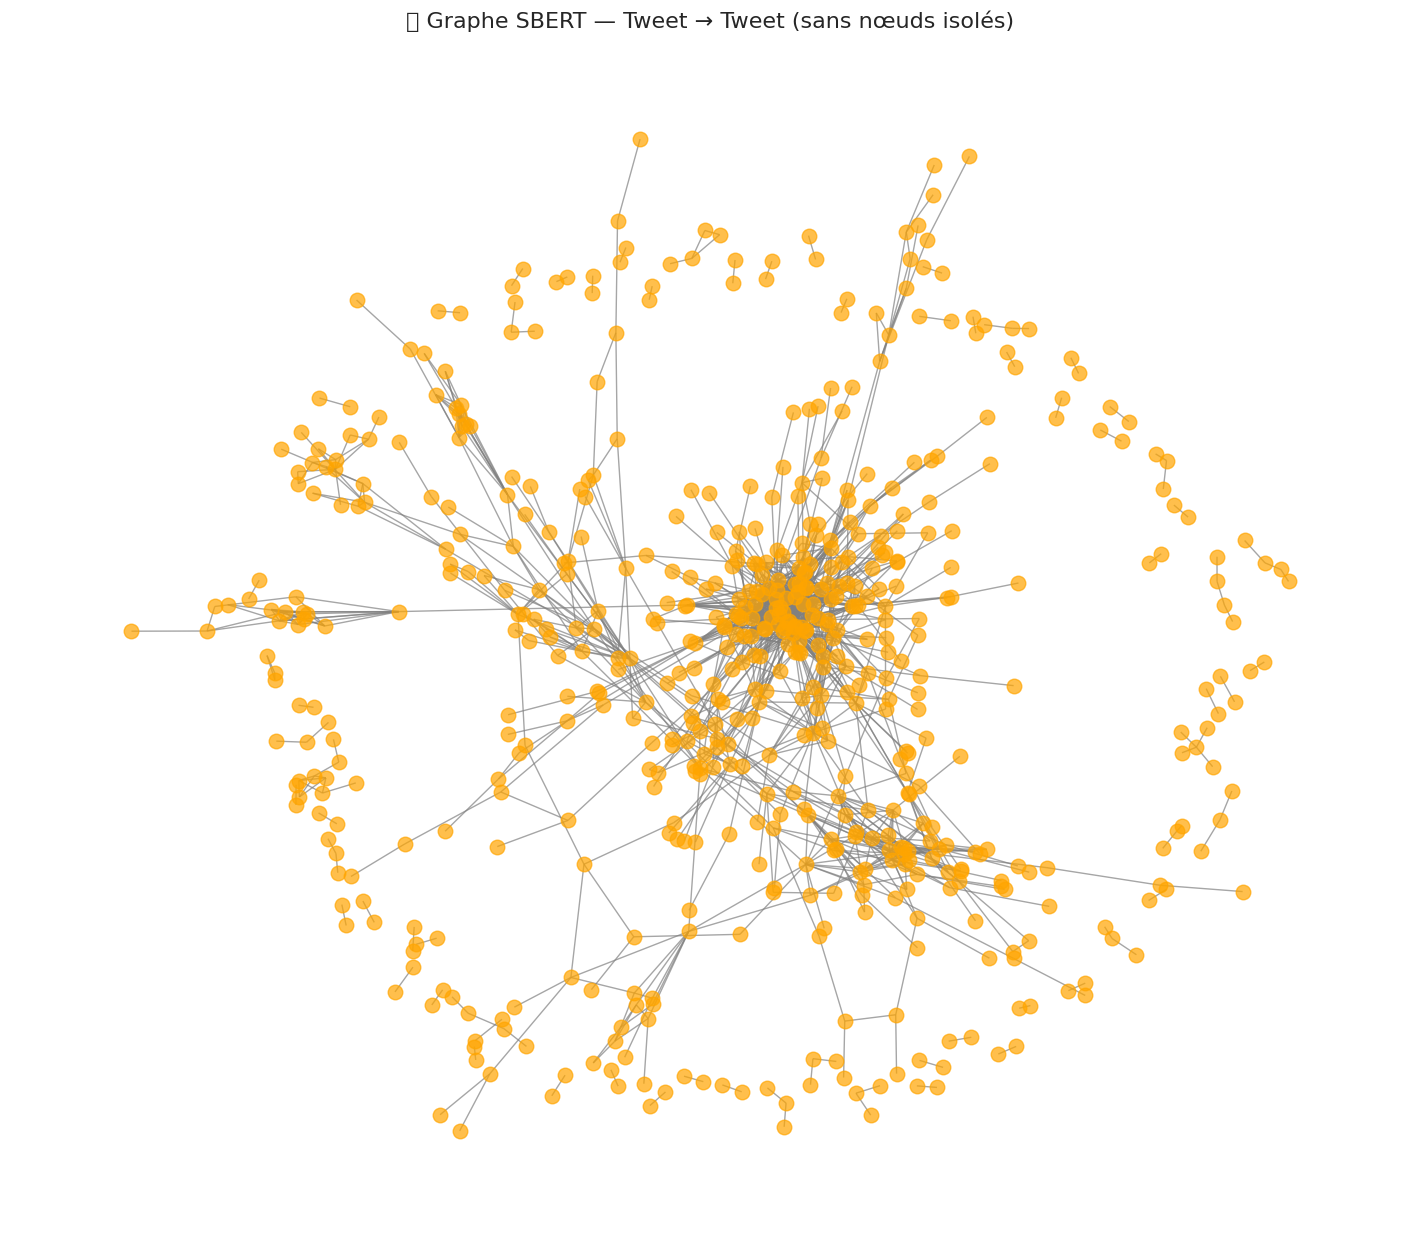

✅ Graphe SBERT filtré généré avec succès !


In [ ]:
# ============================================================
# 📘 Graphe Tweet → Tweet basé sur SBERT (avec filtrage isolés)
# ============================================================

from sentence_transformers import SentenceTransformer
import numpy as np
import torch
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# 0) Vérification dataset
# ------------------------------------------------------------
if "df" not in globals():
    raise ValueError("❌ df introuvable. Charge ton dataset Sentiment140.")

if "text" not in df.columns:
    raise ValueError("❌ Colonne 'text' absente dans df.")

print("✅ Dataset OK :", len(df), "tweets")

# ------------------------------------------------------------
# 1) ÉCHANTILLON (pour éviter explosion RAM)
# ------------------------------------------------------------
MAX_TWEETS = 2000   # 🔥 tu peux changer : 2000 / 3000 / 5000 max

if len(df) > MAX_TWEETS:
    print(f"⚠️ Dataset trop grand ({len(df)}). Échantillonnage → {MAX_TWEETS}")
    df_small = df.sample(MAX_TWEETS, random_state=42).reset_index(drop=True)
else:
    df_small = df.copy()

print("📌 Tweets utilisés pour SBERT :", len(df_small))

# ------------------------------------------------------------
# 2) SBERT Embeddings
# ------------------------------------------------------------
print("⏳ Génération des embeddings SBERT…")

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

texts = df_small["text"].astype(str).tolist()
embeddings = model.encode(texts, convert_to_numpy=True, show_progress_bar=True)

print("✅ Embeddings shape :", embeddings.shape)

# ------------------------------------------------------------
# 3) Matrice de similarité
# ------------------------------------------------------------
print("⏳ Calcul matrice de similarité… (complexité N²)")

similarity_matrix = cosine_similarity(embeddings)

# seuil de similarité
THRESH = 0.55
print("🔗 Seuil similarity =", THRESH)

# ------------------------------------------------------------
# 4) Construction du Graphe
# ------------------------------------------------------------
print("🔧 Construction du graphe Tweet → Tweet…")

G = nx.Graph()

# Ajouter noeuds
for i in range(len(df_small)):
    G.add_node(i, text=df_small.iloc[i]["text"])

# Ajouter edges
for i in range(len(df_small)):
    for j in range(i+1, len(df_small)):
        if similarity_matrix[i, j] >= THRESH:
            G.add_edge(i, j, weight=float(similarity_matrix[i, j]))

print("📌 Nombre de nœuds :", G.number_of_nodes())
print("📌 Nombre d’arêtes :", G.number_of_edges())

# ------------------------------------------------------------
# 4-bis) Filtrage des nœuds isolés
# ------------------------------------------------------------
print("⏳ Suppression des nœuds isolés…")

G_filtered = G.copy()
isolated_nodes = list(nx.isolates(G_filtered))

print("🗑️ Nombre de nœuds isolés supprimés :", len(isolated_nodes))

G_filtered.remove_nodes_from(isolated_nodes)

print("📌 Nouveau nombre de nœuds :", G_filtered.number_of_nodes())
print("📌 Nouveau nombre d’arêtes :", G_filtered.number_of_edges())

# ------------------------------------------------------------
# 5) Visualisation du Graphe filtré
# ------------------------------------------------------------
plt.figure(figsize=(14, 12))

pos = nx.spring_layout(G_filtered, seed=42, k=0.45)

nx.draw(
    G_filtered,
    pos,
    node_color="orange",
    node_size=110,
    edge_color="gray",
    alpha=0.70,
    with_labels=False
)

plt.title("🔶 Graphe SBERT — Tweet → Tweet (sans nœuds isolés)", fontsize=16)
plt.show()

print("✅ Graphe SBERT filtré généré avec succès !")


## ✅ GTN : User–Tweet–Hashtag

In [ ]:
# ============================================================
# 📘 Installation PyTorch + PyG (corrigée)
# ============================================================

!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121

!pip install torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.3.0+cu121.html


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 806.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 583.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/1

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.6/949.6 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [ ]:
# =====================================================
# 📘 Préparation GTN : Multi-relations (construire HeteroData (User, Tweet, Hashtag) + modèle + train)
# =====================================================

import os
import re
import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from torch_geometric.data import HeteroData
from torch_geometric.nn import HeteroConv, SAGEConv
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -------------------------
# 1) Charger / vérifier df
# -------------------------
if "df" not in globals():
    path_guess = "/content/drive/MyDrive/data_clean.csv"
    if os.path.exists(path_guess):
        df = pd.read_csv(path_guess)
        print("df chargé depuis", path_guess)
    else:
        raise ValueError("df introuvable dans la session. Charge CHAPITRE 0 d'abord.")

for c in ["user", "text", "target"]:
    if c not in df.columns:
        raise ValueError(f"Colonne requise manquante: {c}")

print("Nombre de lignes df:", len(df))

# -------------------------
# 2) Sous-échantillonnage (si nécessaire)
# -------------------------
MAX_TWEETS = 4000
if len(df) > MAX_TWEETS:
    print(f"⚠️ Dataset grand ({len(df)}). Sous-échantillonnage à {MAX_TWEETS} tweets.")
    df = df.sample(MAX_TWEETS, random_state=42).reset_index(drop=True)

# index des tweets
tweet_ids = df.index.to_list()

# -------------------------
# 3) Fonctions d'extraction
# -------------------------
def extract_mentions(text):
    return re.findall(r"@([A-Za-z0-9_]+)", str(text))

def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

# -------------------------
# 4) Hashtags & mappings
# -------------------------
all_hashtags = set()
for txt in df["text"].astype(str):
    all_hashtags.update(extract_hashtags(txt))
all_hashtags = list(all_hashtags)

users = pd.unique(df["user"].astype(str)).tolist()
user2id = {u:i for i,u in enumerate(users)}
tweet2id = {idx:i for i,idx in enumerate(tweet_ids)}
hashtag2id = {h:i for i,h in enumerate(all_hashtags)}

print("Users:", len(users), "Tweets:", len(tweet_ids), "Hashtags:", len(all_hashtags))

# -------------------------
# 5) Build HeteroData
# -------------------------
data = HeteroData()
data["user"].num_nodes = len(users)
data["tweet"].num_nodes = len(tweet_ids)
data["hashtag"].num_nodes = len(all_hashtags)

# tweet -> written_by -> user
src_tw = []
dst_tw = []
for idx, row in df.iterrows():
    t = tweet2id[idx]
    u = user2id[str(row["user"])]
    src_tw.append(t)
    dst_tw.append(u)
if len(src_tw) > 0:
    data["tweet", "written_by", "user"].edge_index = torch.tensor([src_tw, dst_tw], dtype=torch.long)
else:
    data["tweet", "written_by", "user"].edge_index = torch.empty((2,0), dtype=torch.long)

# user -> mentions -> user
src_m = []
dst_m = []
for idx, row in df.iterrows():
    author = str(row["user"])
    mentions = extract_mentions(row["text"])
    for m in mentions:
        if m in user2id:
            src_m.append(user2id[author])
            dst_m.append(user2id[m])
if len(src_m) > 0:
    data["user", "mentions", "user"].edge_index = torch.tensor([src_m, dst_m], dtype=torch.long)
else:
    data["user", "mentions", "user"].edge_index = torch.empty((2,0), dtype=torch.long)

# tweet -> has_tag -> hashtag
src_th = []
dst_th = []
for idx, row in df.iterrows():
    t = tweet2id[idx]
    tags = extract_hashtags(row["text"])
    for tg in tags:
        if tg in hashtag2id:
            src_th.append(t)
            dst_th.append(hashtag2id[tg])
if len(src_th) > 0:
    data["tweet", "has_tag", "hashtag"].edge_index = torch.tensor([src_th, dst_th], dtype=torch.long)
else:
    data["tweet", "has_tag", "hashtag"].edge_index = torch.empty((2,0), dtype=torch.long)

print("Edges ajoutées. Détails :")
for rel in data.edge_types:
    e = data[rel].edge_index.shape[1]
    print(" -", rel, ":", e, "arêtes")

# -------------------------
# 6) Features (SBERT)
# -------------------------
print("⏳ Calcul des embeddings SBERT (tweets + hashtags + user-agg)...")
sbert = globals().get("model_sbert", None)
if sbert is None:
    sbert = SentenceTransformer("all-MiniLM-L6-v2")

tweet_texts = df["text"].astype(str).tolist()
tweet_embs = sbert.encode(tweet_texts, convert_to_numpy=True, show_progress_bar=True).astype(np.float32)
data["tweet"].x = torch.tensor(tweet_embs, dtype=torch.float)

user_emb_dim = tweet_embs.shape[1]
user_feats = np.zeros((len(users), user_emb_dim), dtype=np.float32)
user_counts = np.zeros(len(users), dtype=np.int32)
for i, row in df.iterrows():
    uidx = user2id[str(row["user"])]
    user_feats[uidx] += tweet_embs[i]
    user_counts[uidx] += 1
for i in range(len(users)):
    if user_counts[i] > 0:
        user_feats[i] /= user_counts[i]
data["user"].x = torch.tensor(user_feats, dtype=torch.float)

if len(all_hashtags) > 0:
    hashtag_embs = sbert.encode(all_hashtags, convert_to_numpy=True).astype(np.float32)
    data["hashtag"].x = torch.tensor(hashtag_embs, dtype=torch.float)
else:
    data["hashtag"].x = torch.empty((0, user_emb_dim), dtype=torch.float)

print("✅ Features assigned: tweet x, user x, hashtag x")

# -------------------------
# 7) Labels (tweet sentiment)
# -------------------------
y = df["target"].replace({0:0, 4:1}).astype(int).values
data["tweet"].y = torch.tensor(y, dtype=torch.long)

num_tweets = data["tweet"].num_nodes
train_idx, test_idx = train_test_split(np.arange(num_tweets), test_size=0.2, random_state=42, stratify=y)
train_mask = torch.zeros(num_tweets, dtype=torch.bool)
test_mask = torch.zeros(num_tweets, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True
data["tweet"].train_mask = train_mask
data["tweet"].test_mask = test_mask

print("✅ Labels and masks ready.")

# -------------------------
# 8) Add reverse edges (so each node type can be destination)
# -------------------------
# tweet -> written_by -> user  => add (user, written_by_rev, tweet)
if ("tweet","written_by","user") in data.edge_types:
    e = data["tweet","written_by","user"].edge_index
    if e.numel() > 0:
        data["user","written_by_rev","tweet"].edge_index = e.flip(0).clone()

# tweet -> has_tag -> hashtag => add (hashtag, has_tag_rev, tweet)
if ("tweet","has_tag","hashtag") in data.edge_types:
    e = data["tweet","has_tag","hashtag"].edge_index
    if e.numel() > 0:
        data["hashtag","has_tag_rev","tweet"].edge_index = e.flip(0).clone()

# user mentions is user->user: we also add reverse duplicates to make messages symmetric
if ("user","mentions","user") in data.edge_types:
    e = data["user","mentions","user"].edge_index
    if e.numel() > 0:
        # concatenate reverse edges to make undirected-like connectivity
        rev = e.flip(0).clone()
        combined = torch.cat([e, rev], dim=1)
        data["user","mentions","user"].edge_index = combined

print("Edge types after possible additions:", data.edge_types)

# -------------------------
# 9) Move data to device
# -------------------------
data = data.to(device)

# -------------------------
# 10) Prepare dims & edge_index_dict / x_dict on device
# -------------------------
tweet_dim = data["tweet"].x.shape[1]
user_dim  = data["user"].x.shape[1]
hashtag_dim = data["hashtag"].x.shape[1] if data["hashtag"].num_nodes > 0 else tweet_dim
print("Dims (tweet,user,hashtag):", tweet_dim, user_dim, hashtag_dim)

edge_index_dict = {}
for rel in data.edge_types:
    edge_index_dict[rel] = data[rel].edge_index

x_dict = {k: data[k].x for k in data.node_types}

# -------------------------
# 11) Hetero model with explicit in_channels (no Lazy)
# -------------------------
from torch import nn
import torch.nn.functional as F

class HeteroGNNFixed(nn.Module):
    def __init__(self, hidden_channels=128, out_channels=2):
        super().__init__()

        conv1_dict = {}
        # tweet -> user
        if ("tweet","written_by","user") in edge_index_dict:
            conv1_dict[('tweet','written_by','user')] = SAGEConv((tweet_dim, user_dim), hidden_channels)
        # reverse user -> tweet
        if ('user','written_by_rev','tweet') in edge_index_dict:
            conv1_dict[('user','written_by_rev','tweet')] = SAGEConv((user_dim, tweet_dim), hidden_channels)
        # user -> user mentions
        if ('user','mentions','user') in edge_index_dict:
            conv1_dict[('user','mentions','user')] = SAGEConv((user_dim, user_dim), hidden_channels)
        # tweet -> hashtag
        if ('tweet','has_tag','hashtag') in edge_index_dict:
            conv1_dict[('tweet','has_tag','hashtag')] = SAGEConv((tweet_dim, hashtag_dim), hidden_channels)
        # reverse hashtag -> tweet
        if ('hashtag','has_tag_rev','tweet') in edge_index_dict:
            conv1_dict[('hashtag','has_tag_rev','tweet')] = SAGEConv((hashtag_dim, tweet_dim), hidden_channels)

        self.conv1 = HeteroConv(conv1_dict, aggr='sum')

        conv2_dict = {}
        for rel in conv1_dict.keys():
            conv2_dict[rel] = SAGEConv((hidden_channels, hidden_channels), hidden_channels)
        self.conv2 = HeteroConv(conv2_dict, aggr='sum')

        self.lin_tweet = nn.Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        x = self.conv1(x_dict, edge_index_dict)
        x = {k: F.relu(v) for k, v in x.items()}
        x = self.conv2(x, edge_index_dict)
        x = {k: F.relu(v) for k, v in x.items()}
        out = self.lin_tweet(x['tweet'])
        return out

model = HeteroGNNFixed(hidden_channels=128, out_channels=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

print("Model ready. Params:", sum(p.numel() for p in model.parameters()))

# -------------------------
# 12) Training loop (node classification on tweet nodes)
# -------------------------
EPOCHS = 20
best_f1 = 0.0
best_state = None

y_all = data["tweet"].y.to(device)
train_mask = data["tweet"].train_mask.to(device)
test_mask  = data["tweet"].test_mask.to(device)

for epoch in range(1, EPOCHS+1):
    model.train()
    optimizer.zero_grad()
    out = model(x_dict, edge_index_dict)   # (num_tweets, 2)
    loss = criterion(out[train_mask], y_all[train_mask])
    loss.backward()
    optimizer.step()

    # eval
    model.eval()
    with torch.no_grad():
        logits = model(x_dict, edge_index_dict)
        preds = logits.argmax(dim=1).cpu().numpy()
        true = y_all.cpu().numpy()

        test_idx_np = test_mask.cpu().numpy()
        preds_test = preds[test_idx_np]
        true_test = true[test_idx_np]

        f1 = f1_score(true_test, preds_test, average='binary')
        acc = accuracy_score(true_test, preds_test)

    if f1 > best_f1:
        best_f1 = f1
        best_state = model.state_dict()
        torch.save(best_state, "/content/drive/MyDrive/gtn_tweet_user_hashtag_best.pt")

    if epoch % 2 == 0 or epoch == 1:
        print(f"Epoch {epoch:02d} — loss {loss.item():.4f} — test_acc {acc:.4f} — test_f1 {f1:.4f}")

print("Training finished. Best F1:", best_f1)
print("Model saved to /content/drive/MyDrive/gtn_tweet_user_hashtag_best.pt")

# -------------------------
# 13) Rapport final
# -------------------------
model.load_state_dict(torch.load("/content/drive/MyDrive/gtn_tweet_user_hashtag_best.pt", map_location=device))
model.eval()
with torch.no_grad():
    logits = model(x_dict, edge_index_dict)
    preds = logits.argmax(dim=1).cpu().numpy()
    true = data['tweet'].y.cpu().numpy()

test_mask_np = data['tweet'].test_mask.cpu().numpy()
print("\nClassification report (test set):")
print(classification_report(true[test_mask_np], preds[test_mask_np]))


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_cluster/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_spline_conv/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue

Device: cpu
Nombre de lignes df: 1600000
⚠️ Dataset grand (1600000). Sous-échantillonnage à 4000 tweets.
Users: 3952 Tweets: 4000 Hashtags: 92
Edges ajoutées. Détails :
 - ('tweet', 'written_by', 'user') : 4000 arêtes
 - ('user', 'mentions', 'user') : 36 arêtes
 - ('tweet', 'has_tag', 'hashtag') : 118 arêtes
⏳ Calcul des embeddings SBERT (tweets + hashtags + user-agg)...


Batches:   0%|          | 0/125 [00:00<?, ?it/s]

✅ Features assigned: tweet x, user x, hashtag x
✅ Labels and masks ready.
Edge types after possible additions: [('tweet', 'written_by', 'user'), ('user', 'mentions', 'user'), ('tweet', 'has_tag', 'hashtag'), ('user', 'written_by_rev', 'tweet'), ('hashtag', 'has_tag_rev', 'tweet')]
Dims (tweet,user,hashtag): 384 384 384
Model ready. Params: 656898


ImportError: cannot import name '_flags' from 'torch.onnx._internal.exporter' (/usr/local/lib/python3.12/dist-packages/torch/onnx/_internal/exporter/__init__.py)

Nœuds initiaux : 8044
Arêtes initiales : 8308
Après suppression des noeuds isolés :
 - Nœuds : 8044
 - Arêtes : 8308
⚠️ Graphe trop grand → échantillonnage 5000 nœuds connectés
Taille finale pour affichage :
 - Nœuds : 2138
 - Arêtes : 2168


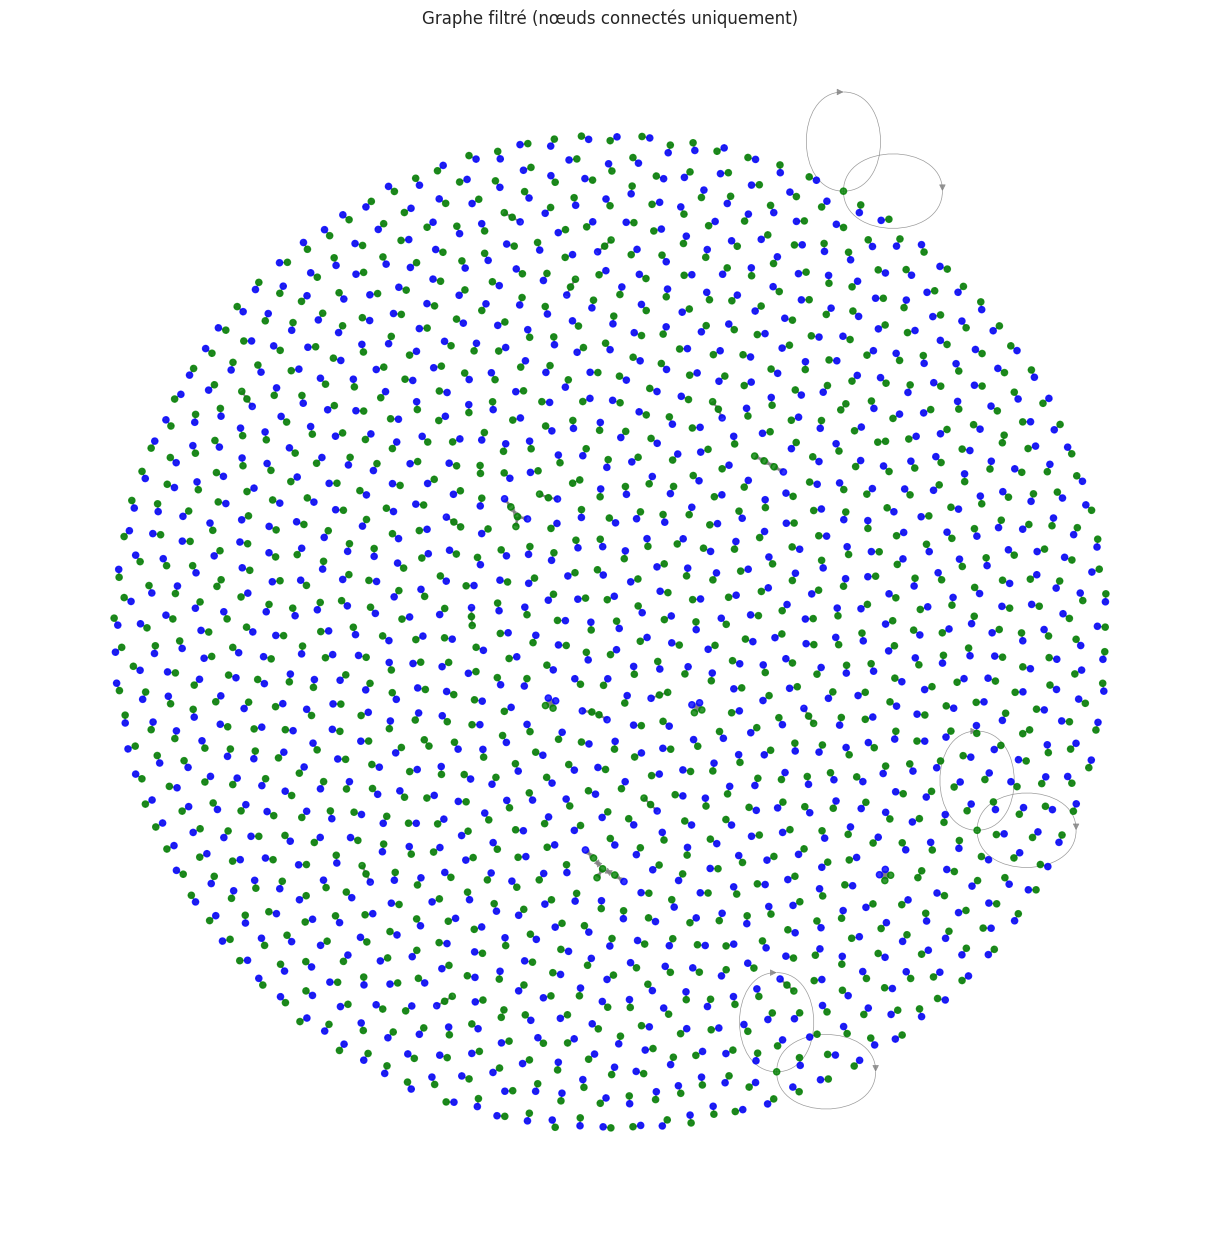

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# =========================================================
# 1) Conversion HeteroData → NetworkX multigraph
# =========================================================
G = nx.MultiDiGraph()

# Ajouter les noeuds
for ntype in data.node_types:
    for i in range(data[ntype].num_nodes):
        G.add_node((ntype, i), ntype=ntype)

# Ajouter les arêtes
for (src, rel, dst) in data.edge_types:
    edge_index = data[(src, rel, dst)].edge_index.cpu().numpy()
    for s, d in zip(edge_index[0], edge_index[1]):
        G.add_edge((src, s), (dst, d), rel=rel)

print("Nœuds initiaux :", len(G.nodes()))
print("Arêtes initiales :", len(G.edges()))

# =========================================================
# 2) SUPPRIMER LES NŒUDS ISOLÉS
# =========================================================
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

print("Après suppression des noeuds isolés :")
print(" - Nœuds :", len(G.nodes()))
print(" - Arêtes :", len(G.edges()))

# =========================================================
# 3) ÉCHANTILLONNER 1000 NŒUDS CONNECTÉS
# =========================================================
MAX_NODES = 5000
if len(G.nodes()) > MAX_NODES:
    print("⚠️ Graphe trop grand → échantillonnage 5000 nœuds connectés")

    # prendre un sous-graphe induit
    keep = list(list(G.nodes())[:MAX_NODES])
    G = G.subgraph(keep).copy()

    # retirer à nouveau les isolés générés par l’échantillonnage
    isolated_after = list(nx.isolates(G))
    G.remove_nodes_from(isolated_after)

print("Taille finale pour affichage :")
print(" - Nœuds :", len(G.nodes()))
print(" - Arêtes :", len(G.edges()))

# =========================================================
# 4) AFFICHAGE DU GRAPHE
# =========================================================
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

# couleurs selon type de noeud
colors = []
for n,attr in G.nodes(data=True):
    if attr["ntype"] == "tweet":
        colors.append("blue")
    elif attr["ntype"] == "user":
        colors.append("green")
    else:
        colors.append("red")

nx.draw(
    G,
    pos,
    node_color=colors,
    node_size=20,
    edge_color="gray",
    width=0.5,
    alpha=0.8
)

plt.title("Graphe filtré (nœuds connectés uniquement)")
plt.show()


## ✅ Chapitre 9 — Graph-RAG : Retriever + Generator (T5)




In [21]:
# =========================================================
# GRAPH-RAG COMPLET : "Quels tweets influencent le plus cette opinion ?"
# =========================================================
import pandas as pd
import numpy as np
import faiss
import networkx as nx
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# ---------------------------------------
# 1) Charger DF
# ---------------------------------------
if "df" not in globals():
    df = pd.read_csv("/content/drive/MyDrive/data_clean.csv")

TEXT_COL = "clean_text" if "clean_text" in df.columns else "text"
df = df.dropna(subset=[TEXT_COL]).reset_index(drop=True)

# ---------------------------------------
# 2) Encoder le dataset (SBERT)
# ---------------------------------------
model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(df[TEXT_COL].tolist(), batch_size=512, show_progress_bar=True)
emb = emb.astype("float32")

# Normalisation pour FAISS
faiss.normalize_L2(emb)

# ---------------------------------------
# 3) Index FAISS pour retrieval
# ---------------------------------------
index = faiss.IndexFlatIP(emb.shape[1])
index.add(emb)

# ---------------------------------------
# 4) Construction du graphe de similarité entre tweets
# ---------------------------------------
G = nx.Graph()

SIM_THRESHOLD = 0.55  # tu peux augmenter

# Ajouter tous les nœuds
for i in range(len(df)):
    G.add_node(i, text=df.iloc[i][TEXT_COL])

# Créer les arêtes entre tweets similaires
batch = 2000
for i in range(0, len(df), batch):
    sims = cosine_similarity(emb[i:i+batch], emb)
    for a in range(sims.shape[0]):
        idx_a = i + a
        for idx_b, score in enumerate(sims[a]):
            if idx_a < idx_b and score >= SIM_THRESHOLD:
                G.add_edge(idx_a, idx_b, weight=float(score))

print("✔ Graphe créé")
print("Noeuds :", G.number_of_nodes())
print("Arêtes :", G.number_of_edges())

# ---------------------------------------
# 5) Fonction Graph-RAG
# ---------------------------------------
def graph_rag(query, top_k=5):
    """
    Retourne les tweets les plus influents pour la question.
    Combinaison :
    - Similarité SBERT avec la requête
    - Centralité dans le graphe (PageRank)
    """

    # Encodage de la requête
    q_emb = model.encode([query]).astype("float32")
    faiss.normalize_L2(q_emb)

    # Recherche FAISS
    D, I = index.search(q_emb, top_k)

    # Récupération des meilleurs tweets pour la requête
    relevant = I[0]
    scores = D[0]

    # Calcul de la centralité PageRank
    pr = nx.pagerank(G, weight="weight")

    # Score final = Similarité × Centralité
    results = []
    for idx, sim in zip(relevant, scores):
        influence = sim * pr[idx]
        results.append((idx, influence, sim, pr[idx], df.iloc[idx][TEXT_COL]))

    # Trier par influence
    results = sorted(results, key=lambda x: x[1], reverse=True)

    return results


# ---------------------------------------
# 6) Exemple d’utilisation
# ---------------------------------------
query = "Quels tweets influencent le plus l'opinion ?"

results = graph_rag(query, top_k=10)

print("\n=====================")
print("   RÉSULTATS GRAPH-RAG")
print("=====================\n")

for idx, influence, sim, pr, text in results:
    print(f"\n🔷 Tweet #{idx}")
    print(f"Influence = {influence:.4f} (Sim={sim:.2f}, PageRank={pr:.4f})")
    print("Texte :", text)
    print("---------------------------------------")


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

✔ Graphe créé
Noeuds : 4000
Arêtes : 2690

   RÉSULTATS GRAPH-RAG


🔷 Tweet #2017
Influence = 0.0011 (Sim=0.43, PageRank=0.0027)
Texte : puzzled with twitter
---------------------------------------

🔷 Tweet #3068
Influence = 0.0006 (Sim=0.42, PageRank=0.0015)
Texte : don know what tweet about
---------------------------------------

🔷 Tweet #3260
Influence = 0.0005 (Sim=0.45, PageRank=0.0011)
Texte : exploring twitter
---------------------------------------

🔷 Tweet #2642
Influence = 0.0003 (Sim=0.46, PageRank=0.0006)
Texte : hey saw your tweets excellent stuff follow can tweet
---------------------------------------

🔷 Tweet #3010
Influence = 0.0002 (Sim=0.51, PageRank=0.0003)
Texte : aniikaaa welome the world twitter
---------------------------------------

🔷 Tweet #3615
Influence = 0.0001 (Sim=0.41, PageRank=0.0003)
Texte : make that retweets
---------------------------------------

🔷 Tweet #2417
Influence = 0.0001 (Sim=0.41, PageRank=0.0003)
Texte : yay twitterific works
----------

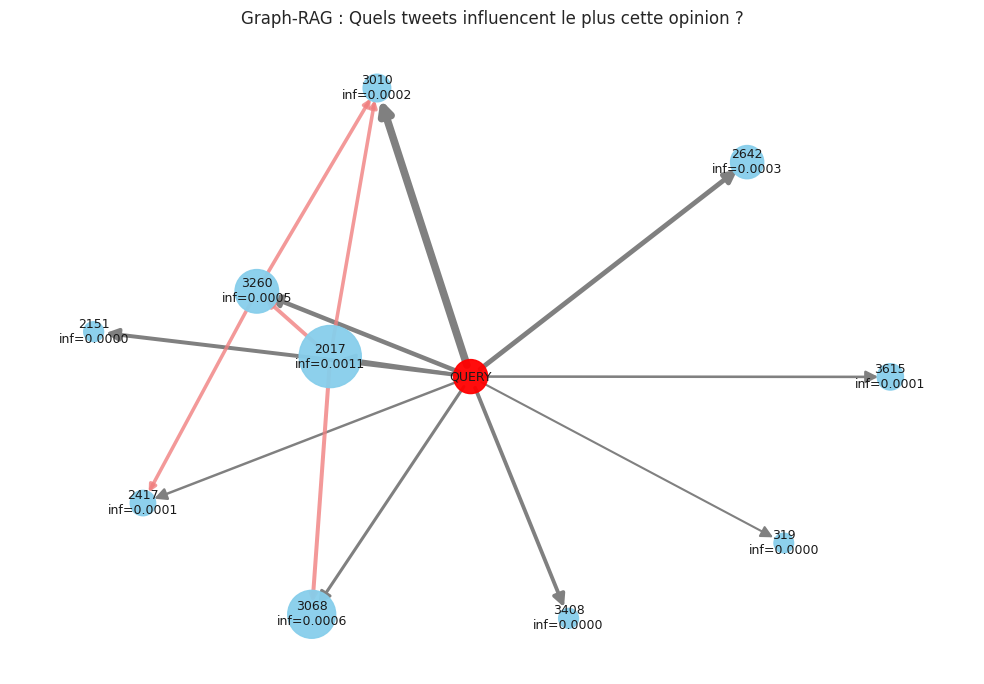

Graph-RAG visuel sauvegardé sous : /content/graph_rag_visual.png


In [22]:
# -------------------------
# Visualisation Graph-RAG (cellule à exécuter après Graph-RAG)
# -------------------------
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def visualize_graph_rag_results(results, G_tweets, df, text_col="clean_text",
                                title="Graph-RAG : Query → Top-k Tweets",
                                save_path="/content/graph_rag_visual.png",
                                show_labels=False):
    """
    results : liste de tuples [(idx, influence, sim, pagerank, text), ...] (issue de graph_rag)
    G_tweets : graphe NetworkX où les nœuds sont des indices entiers de df (tweet indices)
    df : dataframe original (pour retrouver texte si besoin)
    """
    if not results:
        print("Aucun résultat à afficher.")
        return None

    # Construire un graphe dirigé simple QUERY -> doc_i
    H = nx.DiGraph()
    H.add_node("QUERY", type="query")

    # récupérer scores
    influences = [r[1] for r in results]
    sims = [r[2] for r in results]
    idxs = [r[0] for r in results]

    inf_min, inf_max = min(influences), max(influences)
    sim_min, sim_max = min(sims), max(sims)

    # ajouter doc nodes
    for (idx, influence, sim, pr, text) in results:
        label = f"doc_{idx}"
        H.add_node(label, type="doc", idx=idx, influence=influence, sim=sim, pr=pr, text=text)

        # edge from query -> doc
        # normaliser sim pour largeur
        if sim_max - sim_min > 1e-9:
            wnorm = (sim - sim_min) / (sim_max - sim_min)
        else:
            wnorm = 0.5
        H.add_edge("QUERY", label, weight=sim, wnorm=wnorm)

    # ajouter edges doc-doc si elles existent dans G_tweets (graphe de similarité tweet→tweet)
    for i in range(len(idxs)):
        for j in range(i+1, len(idxs)):
            a = idxs[i]
            b = idxs[j]
            if G_tweets.has_edge(a, b):
                w = G_tweets[a][b].get("weight", 1.0)
                H.add_edge(f"doc_{a}", f"doc_{b}", weight=float(w), wnorm=float(w))

            # si G_tweets is undirected it may have reverse
            elif G_tweets.has_edge(b, a):
                w = G_tweets[b][a].get("weight", 1.0)
                H.add_edge(f"doc_{a}", f"doc_{b}", weight=float(w), wnorm=float(w))

    # Layout
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(H, seed=42, k=0.6, iterations=100)

    # Node colors and sizes
    node_colors = []
    node_sizes = []
    for n, attrs in H.nodes(data=True):
        if attrs.get("type") == "query":
            node_colors.append("red")
            node_sizes.append(600)
        else:
            node_colors.append("skyblue")
            # size ~ influence (scaled)
            inf = attrs.get("influence", 0.0)
            if inf_max - inf_min > 1e-9:
                s = 200 + 1800 * (inf - inf_min) / (inf_max - inf_min)
            else:
                s = 300
            node_sizes.append(s)

    # Draw nodes
    nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.95)

    # Draw QUERY->DOC edges with width ~ normalized sim
    query_edges = [(u,v) for (u,v) in H.edges() if u == "QUERY"]
    widths_q = [1.5 + 4.0 * H[u][v].get("wnorm", 0.0) for u,v in query_edges]
    nx.draw_networkx_edges(H, pos, edgelist=query_edges, width=widths_q, edge_color="gray", arrowsize=18, arrowstyle="-|>")

    # Draw doc-doc edges (undirected style)
    doc_edges = [(u,v) for (u,v) in H.edges() if u != "QUERY"]
    if doc_edges:
        widths_d = [0.8 + 3.0 * (H[u][v].get("weight", 0.0)) for u,v in doc_edges]
        nx.draw_networkx_edges(H, pos, edgelist=doc_edges, width=widths_d, edge_color="lightcoral", alpha=0.8)

    # Labels: show small label with score
    labels = {}
    for n,attrs in H.nodes(data=True):
        if n == "QUERY":
            labels[n] = "QUERY"
        else:
            # show index and rounded influence
            labels[n] = f"{attrs.get('idx')}\ninf={attrs.get('influence'):.4f}"

    nx.draw_networkx_labels(H, pos, labels, font_size=9)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.show()

    print(f"Graph-RAG visuel sauvegardé sous : {save_path}")
    return H

# -------------------------
# Exemple : suppose 'results' contient ce que tu as affiché plus haut
# -------------------------
# Si tu as déjà variable `results` issue de graph_rag(query, top_k=10), utilise-la.
# Sinon, recrée : results = graph_rag("ta question", top_k=10)

# Exécution (adapte top_k si besoin)
H = visualize_graph_rag_results(results, G, df, text_col="clean_text",
                                title="Graph-RAG : Quels tweets influencent le plus cette opinion ?",
                                save_path="/content/graph_rag_visual.png",
                                show_labels=False)


## ✅ Chapitre 10 — interface de prediction Streamlit

corriger probleme

In [30]:
!pip install streamlit==1.32.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.1.2
    Uninstalling tenacity-9.1.2:
      Successfully uninstalled tenacity-9.1.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successful

In [1]:
!which streamlit


/usr/local/bin/streamlit


cbon

In [2]:
!pip install streamlit==1.32.0 sentence-transformers faiss-cpu joblib
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb


(Reading database ... 121717 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) over (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...


In [24]:
import os

for root, dirs, files in os.walk("/content/drive", topdown=True):
    for f in files:
        if f.endswith(".pkl") or f.endswith(".bin"):
            print(os.path.join(root, f))


/content/drive/MyDrive/X_tfidf.pkl
/content/drive/MyDrive/X_count.pkl
/content/drive/MyDrive/faiss_index.bin
/content/drive/MyDrive/df_clean.pkl
/content/drive/MyDrive/count_vectorizer.pkl
/content/drive/MyDrive/tfidf_vectorizer.pkl
/content/drive/MyDrive/model_tfidf_lr.pkl
/content/drive/MyDrive/model_tfidf_svm.pkl
/content/drive/MyDrive/model_tfidf_rf.pkl
/content/drive/MyDrive/best_sentiment_model.pkl
/content/drive/MyDrive/df_sample.pkl


In [25]:
!mkdir -p /content/drive/MyDrive/app_deploy


In [26]:
%%writefile /content/drive/MyDrive/app_deploy/app.py

import streamlit as st
import joblib
import faiss
import numpy as np
import os
import torch
from sentence_transformers import SentenceTransformer

# -----------------------------
# FIX PyTorch / Transformers
# -----------------------------
os.environ["TRANSFORMERS_NO_TORCH_LOAD"] = "1"

# -----------------------------
# CHARGEMENT DES FICHIERS
# -----------------------------
TFIDF_PATH = "/content/drive/MyDrive/tfidf_vectorizer.pkl"
MODEL_PATH = "/content/drive/MyDrive/best_sentiment_model.pkl"
FAISS_PATH = "/content/drive/MyDrive/faiss_index.bin"
DF_SAMPLE_PATH = "/content/drive/MyDrive/df_sample.pkl"
SBERT_PATH = "all-MiniLM-L6-v2"


# Charger SBERT depuis HuggingFace
sbert = SentenceTransformer(SBERT_PATH)


tfidf = joblib.load(TFIDF_PATH)
model = joblib.load(MODEL_PATH)
df_sample = joblib.load(DF_SAMPLE_PATH)

index = faiss.read_index(FAISS_PATH)

# -----------------------------
# STYLE DE LA PAGE
# -----------------------------
st.set_page_config(page_title="Twitter Sentiment Analyzer + Graph-RAG")

st.markdown("""
<style>
body { background-color: #eef3f7; }
.box {
    background: white; padding: 30px; border-radius: 15px;
    box-shadow: 0px 0px 12px rgba(0,0,0,0.15);
}
.pos { color: green; font-size: 22px; font-weight: bold; }
.neg { color: red; font-size: 22px; font-weight: bold; }
</style>
""", unsafe_allow_html=True)

st.title("🧠 Twitter Sentiment Analyzer + Graph-RAG")
st.write("Analyse le sentiment + retrouve les tweets les plus influents.")

# -----------------------------
# INPUT UTILISATEUR
# -----------------------------
text = st.text_area("Entre un tweet :", height=120)

if st.button("Analyser le sentiment"):
    if text.strip() == "":
        st.warning("🟡 Veuillez entrer un texte")
    else:
        # SENTIMENT
        vec = tfidf.transform([text])
        pred = model.predict(vec)[0]

        if pred == 1:
            st.markdown("<p class='pos'>🙂 Sentiment POSITIF</p>", unsafe_allow_html=True)
        else:
            st.markdown("<p class='neg'>☹️ Sentiment NÉGATIF</p>", unsafe_allow_html=True)

        st.markdown("---")

        # GRAPH-RAG
        st.subheader("🔍 Tweets les plus influents (Graph-RAG)")

        query_emb = sbert.encode([text], convert_to_numpy=True).astype("float32")
        faiss.normalize_L2(query_emb)

        scores, idx = index.search(query_emb, 5)

        for rank, i in enumerate(idx[0]):
            tweet = df_sample.iloc[i]["clean_text"]
            score = scores[0][rank]
            st.write(f"**→ Tweet #{i}** — score: `{score:.4f}`")
            st.write(tweet)
            st.write("---")


Overwriting /content/drive/MyDrive/app_deploy/app.py


In [3]:
import threading, time, re, subprocess

# --- 1) Lancer Streamlit ---
def run_streamlit():
    subprocess.run([
        "streamlit",
        "run",
        "/content/drive/MyDrive/app_deploy/app.py",
        "--server.port", "8501",
        "--server.headless", "true"
    ])

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

print("⏳ Démarrage de Streamlit...")
time.sleep(8)
print("✅ Streamlit lancé sur localhost:8501")


# --- 2) Lancer cloudflared ---
print("⏳ Création du tunnel Cloudflare...")

tunnel = subprocess.Popen(
    ["cloudflared", "tunnel", "--url", "http://localhost:8501", "--no-autoupdate"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)

for line in tunnel.stderr:
    if "trycloudflare.com" in line:
        url = re.search(r"https://[a-zA-Z0-9.-]+\.trycloudflare\.com", line)
        if url:
            print("\n🎉🎉🎉 TON LIEN STREAMLIT EST PRÊT :")
            print(url.group(0))
            break


⏳ Démarrage de Streamlit...
✅ Streamlit lancé sur localhost:8501
⏳ Création du tunnel Cloudflare...

🎉🎉🎉 TON LIEN STREAMLIT EST PRÊT :
https://george-routers-trades-difficulties.trycloudflare.com


In [29]:
#!cloudflared tunnel --url http://localhost:8501 --no-autoupdate


2025-11-25T19:16:39Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-11-25T19:16:39Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-11-25T19:16:42Z INF +--------------------------------------------------------------------------------------------+
2025-11-25T19:16:42Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-11-25T19:16:42Z INF |  https://baseline-vol-candle-washing.trycloudflare.com

## **✅** chapitre 11 - Fine-tuning du modèle T5 pour Q/A ( Chatbot RAG ) Gradio

In [4]:
!pip install transformers datasets sentencepiece


In [5]:
!pip uninstall -y transformers peft accelerate


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
Found existing installation: peft 0.18.0
Uninstalling peft-0.18.0:
  Successfully uninstalled peft-0.18.0
Found existing installation: accelerate 1.11.0
Uninstalling accelerate-1.11.0:
  Successfully uninstalled accelerate-1.11.0


In [6]:
!pip install transformers==4.38.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.2 which is incompatible.


In [7]:
!pip install peft==0.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 12.4 MB/s eta 0:00:00


In [10]:
!pip install sentence-transformers gradio

from sentence_transformers import SentenceTransformer, util
import torch
import gradio as gr

# ------------------------------
# 🔹 Questions & Réponses internes
# ------------------------------
questions = [
    "C’est quoi un graphe RAG ?",
    "C’est quoi un graphe NN ?",
    "C’est quoi un graphe utilisateur ?",
    "C’est quoi un graphe TN ?",
    "Quelles sont les statistiques du graphe ?"
]

answers = [
    "Un graphe RAG est un graphe de connaissances utilisé pour connecter documents entre eux afin d'améliorer un système RAG.",
    "Un graphe NN (Nearest Neighbors) connecte les nœuds selon la similarité vectorielle.",
    "Un graphe utilisateur connecte les utilisateurs selon leurs interactions sociales.",
    "Un graphe TN (Tweet Network) connecte les tweets selon retweets, réponses et mentions.",
    "Ton graphe contient 4000 nœuds et 2690 arêtes."
]

# ------------------------------
# 🔹 SBERT
# ------------------------------
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
embeddings = model.encode(questions, convert_to_tensor=True)

THRESHOLD = 0.55

# ------------------------------
# 🔹 Chatbot
# ------------------------------
def chatbot(message, history):
    query_emb = model.encode(message, convert_to_tensor=True)
    scores = util.cos_sim(query_emb, embeddings)[0]

    best_idx = int(torch.argmax(scores))
    best_score = float(scores[best_idx])

    if best_score < THRESHOLD:
        return f"Désolé, je n'ai pas compris votre question. (score={best_score:.2f})"

    return answers[best_idx]

# ------------------------------
# 🔹 Gradio UI
# ------------------------------
demo = gr.ChatInterface(
    fn=chatbot,
    title="Chatbot RAG (avec seuil de confiance)",
    description="Répond uniquement aux questions connues."
)

demo.launch()


  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)


/usr/local/lib/python3.12/dist-packages/gradio/chat_interface.py:347: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://712c992b523000d998.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


cas de openAI de LLM:

!pip install sentence-transformers gradio openai

from sentence_transformers import SentenceTransformer, util
import torch
import gradio as gr

from openai import OpenAI
import os

# ----------------------------------------------------
# 🔐 Mets ici ta clé API OpenAI via "https://platform.openai.com/api-keys"
# ----------------------------------------------------
os.environ["OPENAI_API_KEY"] = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

client = OpenAI()

# ------------------------------
# 🔹 Questions & Réponses internes
# ------------------------------
questions = [
    "C’est quoi un graphe RAG ?",
    "C’est quoi un graphe NN ?",
    "C’est quoi un graphe utilisateur ?",
    "C’est quoi un graphe TN ?",
    "Quelles sont les statistiques du graphe ?"
]

answers = [
    "Un graphe RAG est un graphe de connaissances utilisé pour connecter documents, entités ou chunks afin d'améliorer un système RAG.",
    "Un graphe NN (Nearest Neighbors) connecte les nœuds selon la similarité vectorielle.",
    "Un graphe utilisateur connecte les utilisateurs entre eux selon leurs interactions sociales.",
    "Un graphe TN (Tweet Network) connecte les tweets selon retweets, réponses et mentions.",
    "Ton graphe contient 4000 nœuds, 2690 arêtes pour un batch de 2000 tweets."
]

# ------------------------------
# 🔹 SBERT
# ------------------------------
encoder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
embeddings = encoder.encode(questions, convert_to_tensor=True)

# ------------------------------
# 🔹 Seuil de similarité
# ------------------------------
THRESHOLD = 0.55   # augmente à 0.65 si tu veux plus strict

# ------------------------------
# 🔹 Fonction chatbot sécurisée
# ------------------------------
def chatbot(message, history):

    # Similarité SBERT
    query_emb = encoder.encode(message, convert_to_tensor=True)
    scores = util.cos_sim(query_emb, embeddings)[0]

    best_idx = int(torch.argmax(scores))
    best_score = float(scores[best_idx])

    # seuil minimal
    if best_score < THRESHOLD:
        return f"❌ Désolé, je n'ai pas compris votre question. (score={best_score:.2f})"

    base_answer = answers[best_idx]

    # Reformulation avec OpenAI
    prompt = f"""
Tu es un expert en graphes. Reformule la réponse suivante de manière claire :
"{base_answer}"
"""

    response = client.responses.create(
        model="gpt-4o-mini",
        input=prompt
    )

    final_answer = response.output_text

    return final_answer

# ------------------------------
# 🔹 Interface Gradio
# ------------------------------
demo = gr.ChatInterface(
    fn=chatbot,
    title="Chatbot RAG (avec seuil de confiance)",
    description="Le bot répond seulement si la question est proche d'une question connue."
)

demo.launch()
